# Worksheet 3
### Each question is worth 5 marks. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm, kron
import functools as ft


#plt.rcParams['text.usetex'] = True #comment this line if LaTeX is not installed in your system

## 1
Consider a simple harmonic oscillator with Hamiltonian $$ \hat{H} = \hbar\omega_0 \hat{a}^\dagger\hat{a}.$$ 

(a) Write down the Heisenberg equation for the annihilation operator $\hat{a}$ and show that its solution is $$\hat{a}(t) = {\rm e}^{-{\rm i}\omega_0 t} \hat{a}(0).$$

(b) Find the general analytical solution for the Heisenberg evolution of the coordinate $\hat{q}(t)$ and momentum $\hat{p}(t)$ in terms of the initial conditions $\hat{q}(0)$ and $\hat{p}(0)$.

(c) Compute the expectation values $\langle \hat{q}(t)\rangle$, $\langle \hat{q}(t)^2\rangle$, $\langle 
\hat{n}(t)\rangle$ and $\langle \hat{n}(t)^2\rangle$ given the initial state
$$|\psi(0)\rangle = \frac{1}{\sqrt{2}}\left(|1\rangle - |2\rangle\right),$$
where $|n\rangle$ are Fock states.

(d) Plot the number fluctuations $\Delta \hat{n} = \sqrt{\langle \hat{n}^2\rangle - \langle \hat{n}\rangle^2}$ and the dimensionless position fluctuations $\Delta \hat{q}/q_0$ as a function of dimensionless time $\omega_0 t$ up to $\omega_0t = 10$.

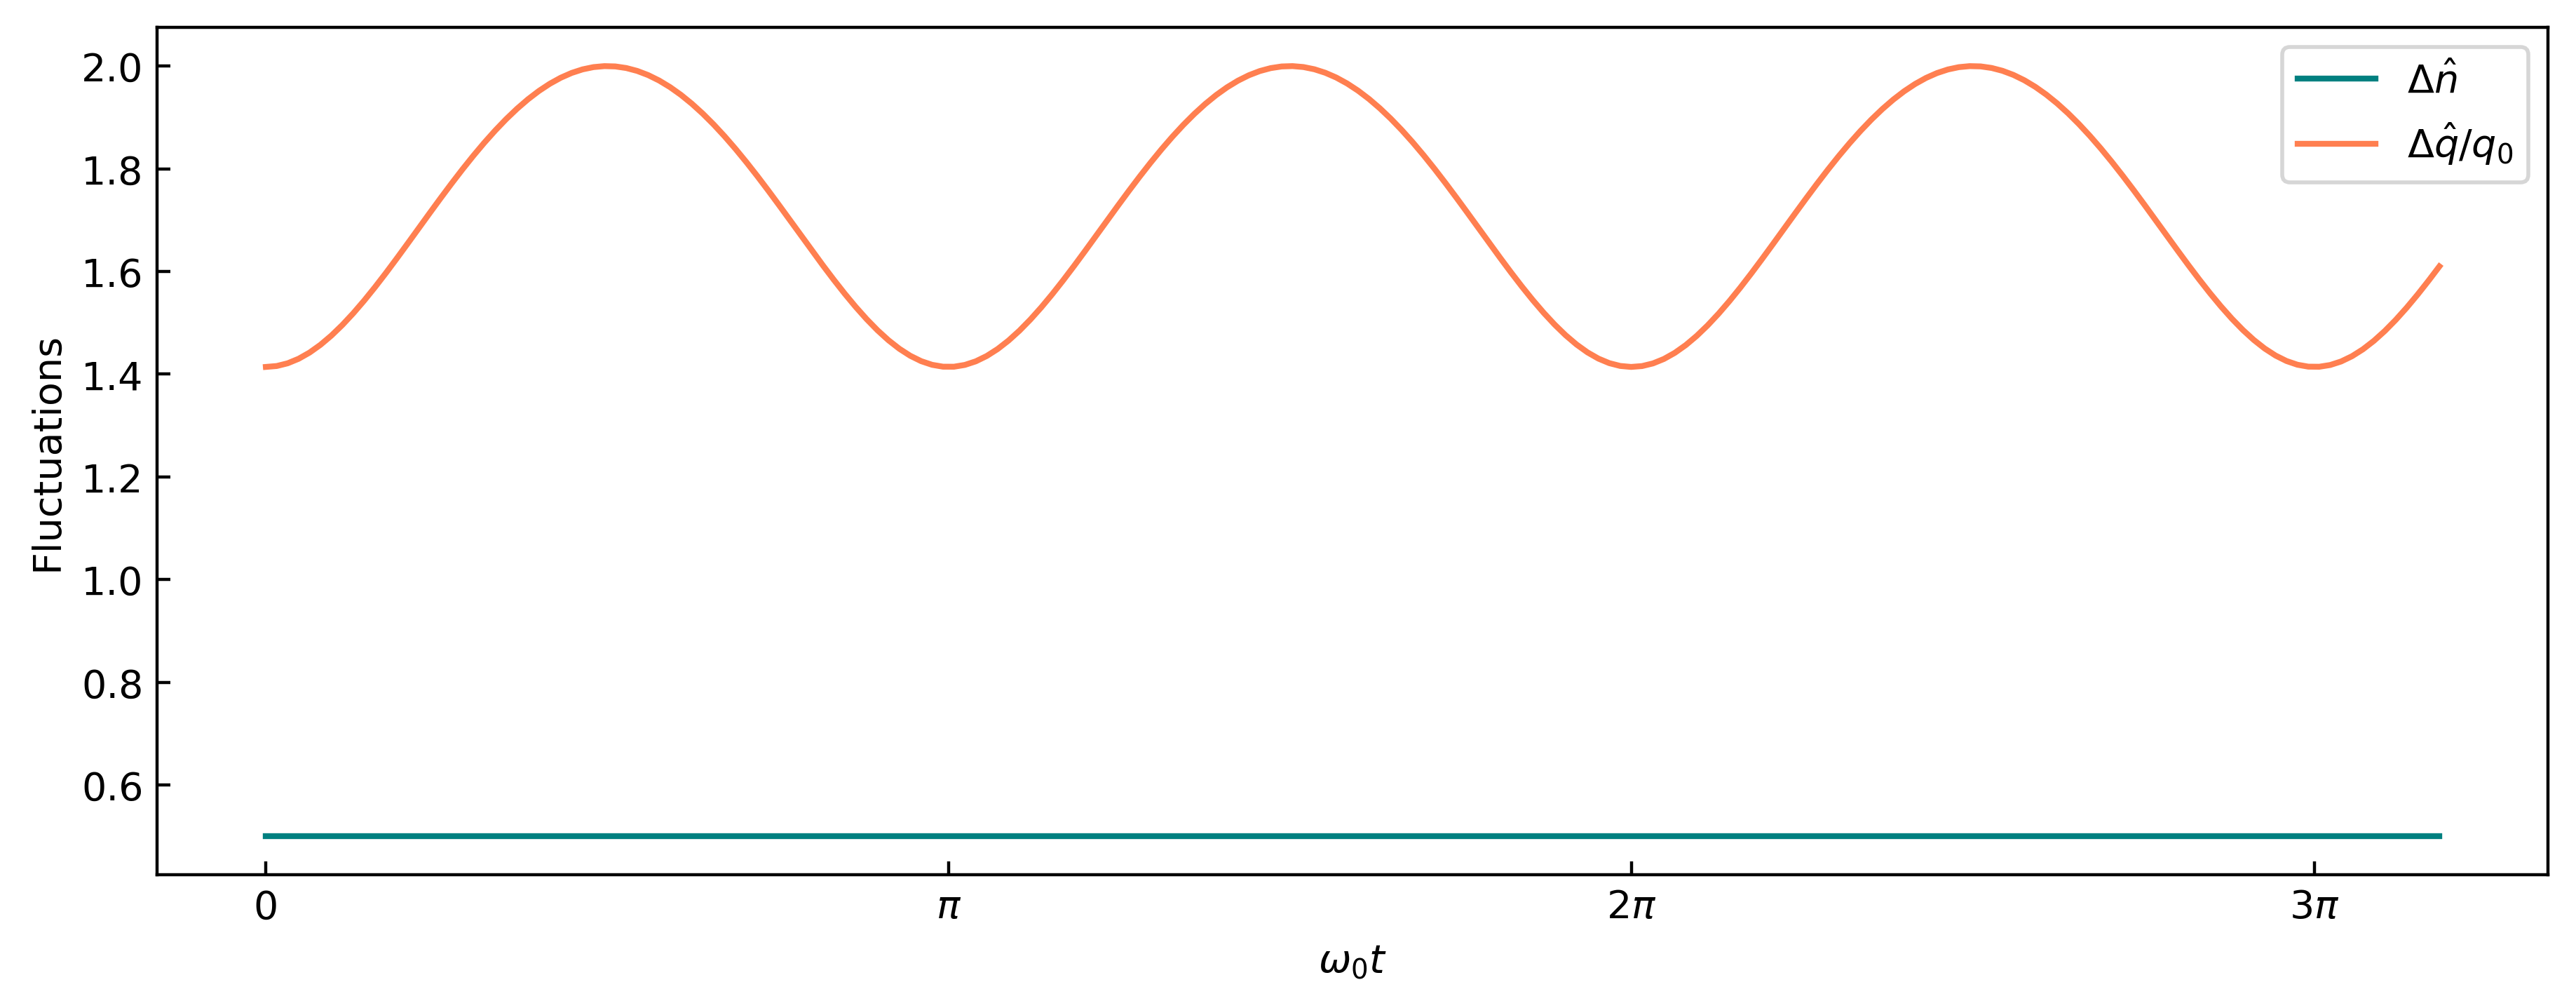

In [2]:
#first we prepare it to do it numerically, and finally we also plot the analytical result
w0 = 1
time_size = 200
t = np.linspace(0, 10/w0, time_size)
dt = t[1]-t[0]

def fock(number, d):
    f = np.zeros((1, d))
    f[0, number] = 1
    return f.T

def anihilation(d):
    a = np.zeros((d, d))
    for i in range(d-1):
        a[i,i+1] = np.sqrt(i+1)
    return a

def U_evolution(w, dt, H):
    Us = expm(-1j * H * dt)
    return Us

max_fock = 4+1

a = anihilation(max_fock)
adag = a.T
N = adag @ a
H = w0 * N
U = U_evolution(w0, dt, H)

state = 1/np.sqrt(2) * (fock(1, max_fock) - fock(2, max_fock))
states = [state]
exp_N = (state.T.conjugate() @ N @ state).real #expectation value of N
exp_N2 = (state.T.conjugate() @ N @ N @ state).real #expectation value of N^2
fluc_N = [np.sqrt(float(exp_N2) - float(exp_N)**2)] #fluctuations of N
exp_q = (state.T.conjugate() @ (a+adag) @ state).real #exp value of q
exp_q2 = (state.T.conjugate() @ np.linalg.matrix_power(a+adag, 2) @ state).real #exp value of q^2
fluc_q = [np.sqrt(float(exp_q2) - float(exp_q)**2)] #fluctuations of q

for i in range(1, time_size):
    state = U @ state
    states.append(state)
    exp_N = (state.T.conjugate() @ N @ state).real
    exp_N2 = (state.T.conjugate() @ N @ N @ state).real
    fluc_N.append(np.sqrt(float(exp_N2) - float(exp_N)**2))
    exp_q = (state.T.conjugate() @ (a+adag) @ state).real
    exp_q2 = (state.T.conjugate() @ np.linalg.matrix_power(a+adag, 2) @ state).real
    fluc_q.append(np.sqrt(float(exp_q2) - float(exp_q)**2))

    
plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.plot(np.linspace(0, 10*w0, time_size), fluc_N, c='teal', label=r'$\Delta\hat{n}$')
plt.plot(np.linspace(0, 10*w0, time_size), fluc_q, c='coral', label=r'$\Delta\hat{q}/q_0$')
plt.xticks([i*np.pi for i in range(4)], ['0', '$\pi$']+[r'$'+str(i)+'\pi$' for i in range(2,4)])
plt.xlabel(r'$\omega_0t$')
plt.ylabel('Fluctuations')
plt.legend()
plt.show()

Without setting the scale, we can see how numerical error gets acumulated in time (but it is not significant in the time range considered). This error might be due to the finite dimensions of the operators, which is a numerical approximation.

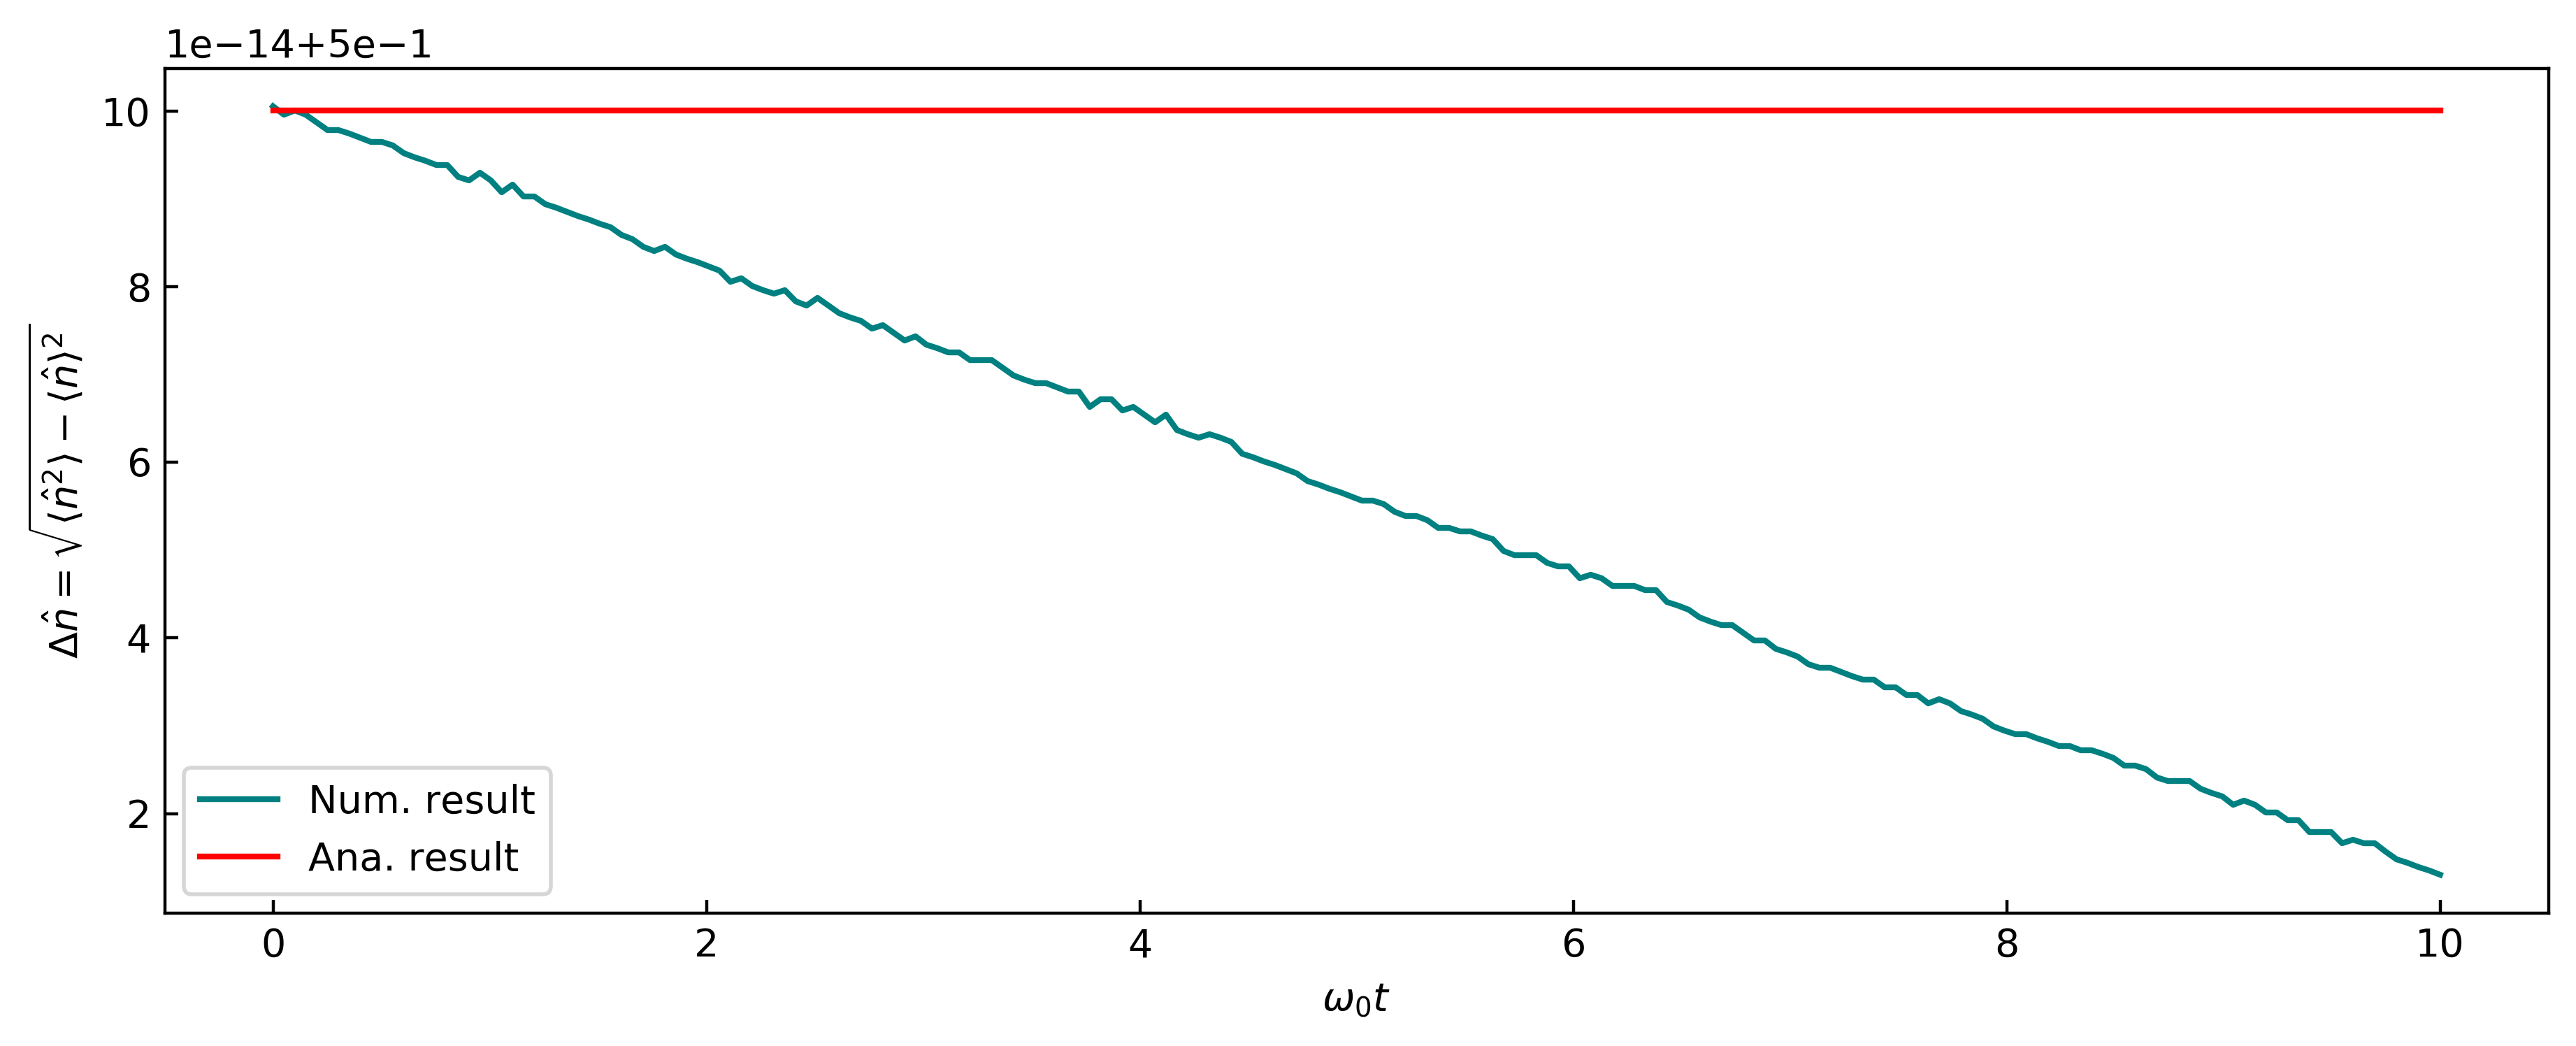

In [3]:
plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.plot(np.linspace(0, 10*w0, time_size), fluc_N, c='teal', label='Num. result')
plt.plot(np.linspace(0, 10*w0, time_size), [np.sqrt(5/2 - (3/2)**2) for i in range(time_size)], c='red', label='Ana. result')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\Delta \hat{n} = \sqrt{\langle \hat{n}^2\rangle - \langle \hat{n}\rangle^2}$')
plt.legend()
plt.show()

## 2
A driven harmonic oscillator is described by the Hamiltonian
$$ \hat{H} = \hbar\omega_0\hat{a}^\dagger\hat{a} + \hbar F\cos(\omega_{\rm d} t+\varphi)\left(\hat{a}+\hat{a}^\dagger\right),$$
where $F$, $\omega_{\rm d}$, and $\varphi$ denote the strength, the frequency, and the phase of the drive, respectively. 

(a) Move to an interaction picture with respect to the free Hamiltonian $\hat{H}_0 = \hbar\omega_{\rm d}\hat{a}^\dagger\hat{a}$ and show that the interaction-picture Hamiltonian under the rotating-wave approximation takes the form
$$\hat{H}_I = \hbar\Delta \hat{a}^\dagger\hat{a} + \frac{\hbar F}{2}\left({\rm e}^{{\rm i}\varphi} \hat{a}+{\rm e}^{-{\rm i}\varphi} \hat{a}^\dagger \right),$$
where $\Delta =\omega_0-\omega_{\rm d}$. State the conditions for this approximation to be valid.


(b) Consider the case of a resonant drive, $\omega_{\rm d} = \omega_0$. Write an explicit expression for the time evolution operator in the interaction picture. Thus find the interaction-picture state at time $t$, $|\psi_I(t)\rangle$, given that the system is initially in the vacuum state, $|\psi(0)\rangle = |0\rangle$.



(c) Using your answer from part (b), write down the state in the Schrödinger picture at time $t$. Draw a sketch of the corresponding Wigner function and how it evolves in time.

(d) Now consider the case where $\omega_{\rm d} \neq \omega_0$. Show that the interaction-picture Hamiltonian is diagonalised by the unitary change of basis $\hat{S}={\rm e}^{\hat{G}}$ with $$\hat{G} = \frac{F}{2\Delta}\left({\rm e}^{{\rm i}\varphi} \hat{a}-{\rm e}^{-{\rm i}\varphi} \hat{a}^\dagger \right).$$ Specifically, find the transformed Hamiltonian $\hat{S}^\dagger \hat{H}_I\hat{S}$ and, therefore, give general expressions for eigenvalues and eigenstates of $\hat{H}_I$.

## 3 
Consider two harmonic oscillators with frequencies $\omega_1$ and $\omega_2$ that are coupled together with strength $g$. The situation is described by the Hamiltonian 
$$\hat{H} = \hbar\omega_1 \hat{a}_1^\dagger \hat{a}_1 + \hbar\omega_2 \hat{a}_2^\dagger \hat{a}_2 + \frac{\hbar g}{2}\left(\hat{a}^\dagger_1\hat{a}_2 + \hat{a}_1 \hat{a}_2^\dagger\right),$$
where $\hat{a}^\dagger_{1}$ and $\hat{a}^\dagger_2$ are creation operators that create one quantum of energy in mode $1$ and mode $2$, respectively. We have the canonical commutation relations $[\hat{a}_j,\hat{a}_k^\dagger] = \delta_{jk}$ and $[\hat{a}_j,\hat{a}_k] = 0$ for $j,k \in \{1,2\}$.

(a) Write down the Heisenberg equations for the annihilation operators $\hat{a}_1$ and $\hat{a}_2$.

(b) Consider the new mode operators $$\hat{b}_1 = \cos(\theta) \hat{a}_1 + \sin(\theta) \hat{a}_2, \qquad \hat{b}_2 =\cos(\theta) \hat{a}_2 - \sin(\theta) \hat{a}_1,$$
where $\tan(2\theta) = g/(\omega_1-\omega_2)$. Demonstrate that these new operators obey canonical commutation relations $[\hat{b}_j,\hat{b}_k^\dagger]=\delta_{jk}$. 

(c) The mode transformation can also be written as $$\begin{pmatrix}\hat{b}_1 \\ \hat{b}_2 \end{pmatrix} = \begin{pmatrix} \cos\theta & \sin \theta \\ -\sin\theta & \cos\theta \end{pmatrix}\begin{pmatrix}\hat{a}_1 \\ \hat{a}_2 \end{pmatrix}.$$ Show that the above matrix is unitary. Invert the transformation to find expressions for $\hat{a}_1$ and $\hat{a}_2$ in terms of $\hat{b}_1$ and $\hat{b}_2$. Thus, show that the Hamiltonian can be written in the form $$\hat{H} = \sum_{j=1}^2 \hbar\nu_j \hat{b}^\dagger_j\hat{b}_j,$$ and state the corresponding eigenfrequencies $\nu_1$ and $\nu_2$.

(d) Write down the Heisenberg equations for the operators $\hat{b}_1$ and $\hat{b}_2$. Use these to find the solution for the Heisenberg equations for $\hat{a}_1$ and $\hat{a}_2$.

## 4 
Consider the *cat state*
$$|\psi_+\rangle = \frac{1}{N_+}\left(|\bar{\alpha}\rangle + |-\bar{\alpha}\rangle\right),$$
where $|\bar{\alpha}\rangle $ and $|-\bar{\alpha}\rangle$ are coherent states.

(a) Assume that $|\psi_+\rangle$ is normalised. What is the value of the normalisation constant $N_+$?

(b) Derive an expression for the Husimi Q-function for the state $|\psi_+\rangle$. Make a [contour plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) of the Q-function in the complex $\alpha$-plane for $\bar{\alpha} = 1$ and $\bar{\alpha} = 3$.

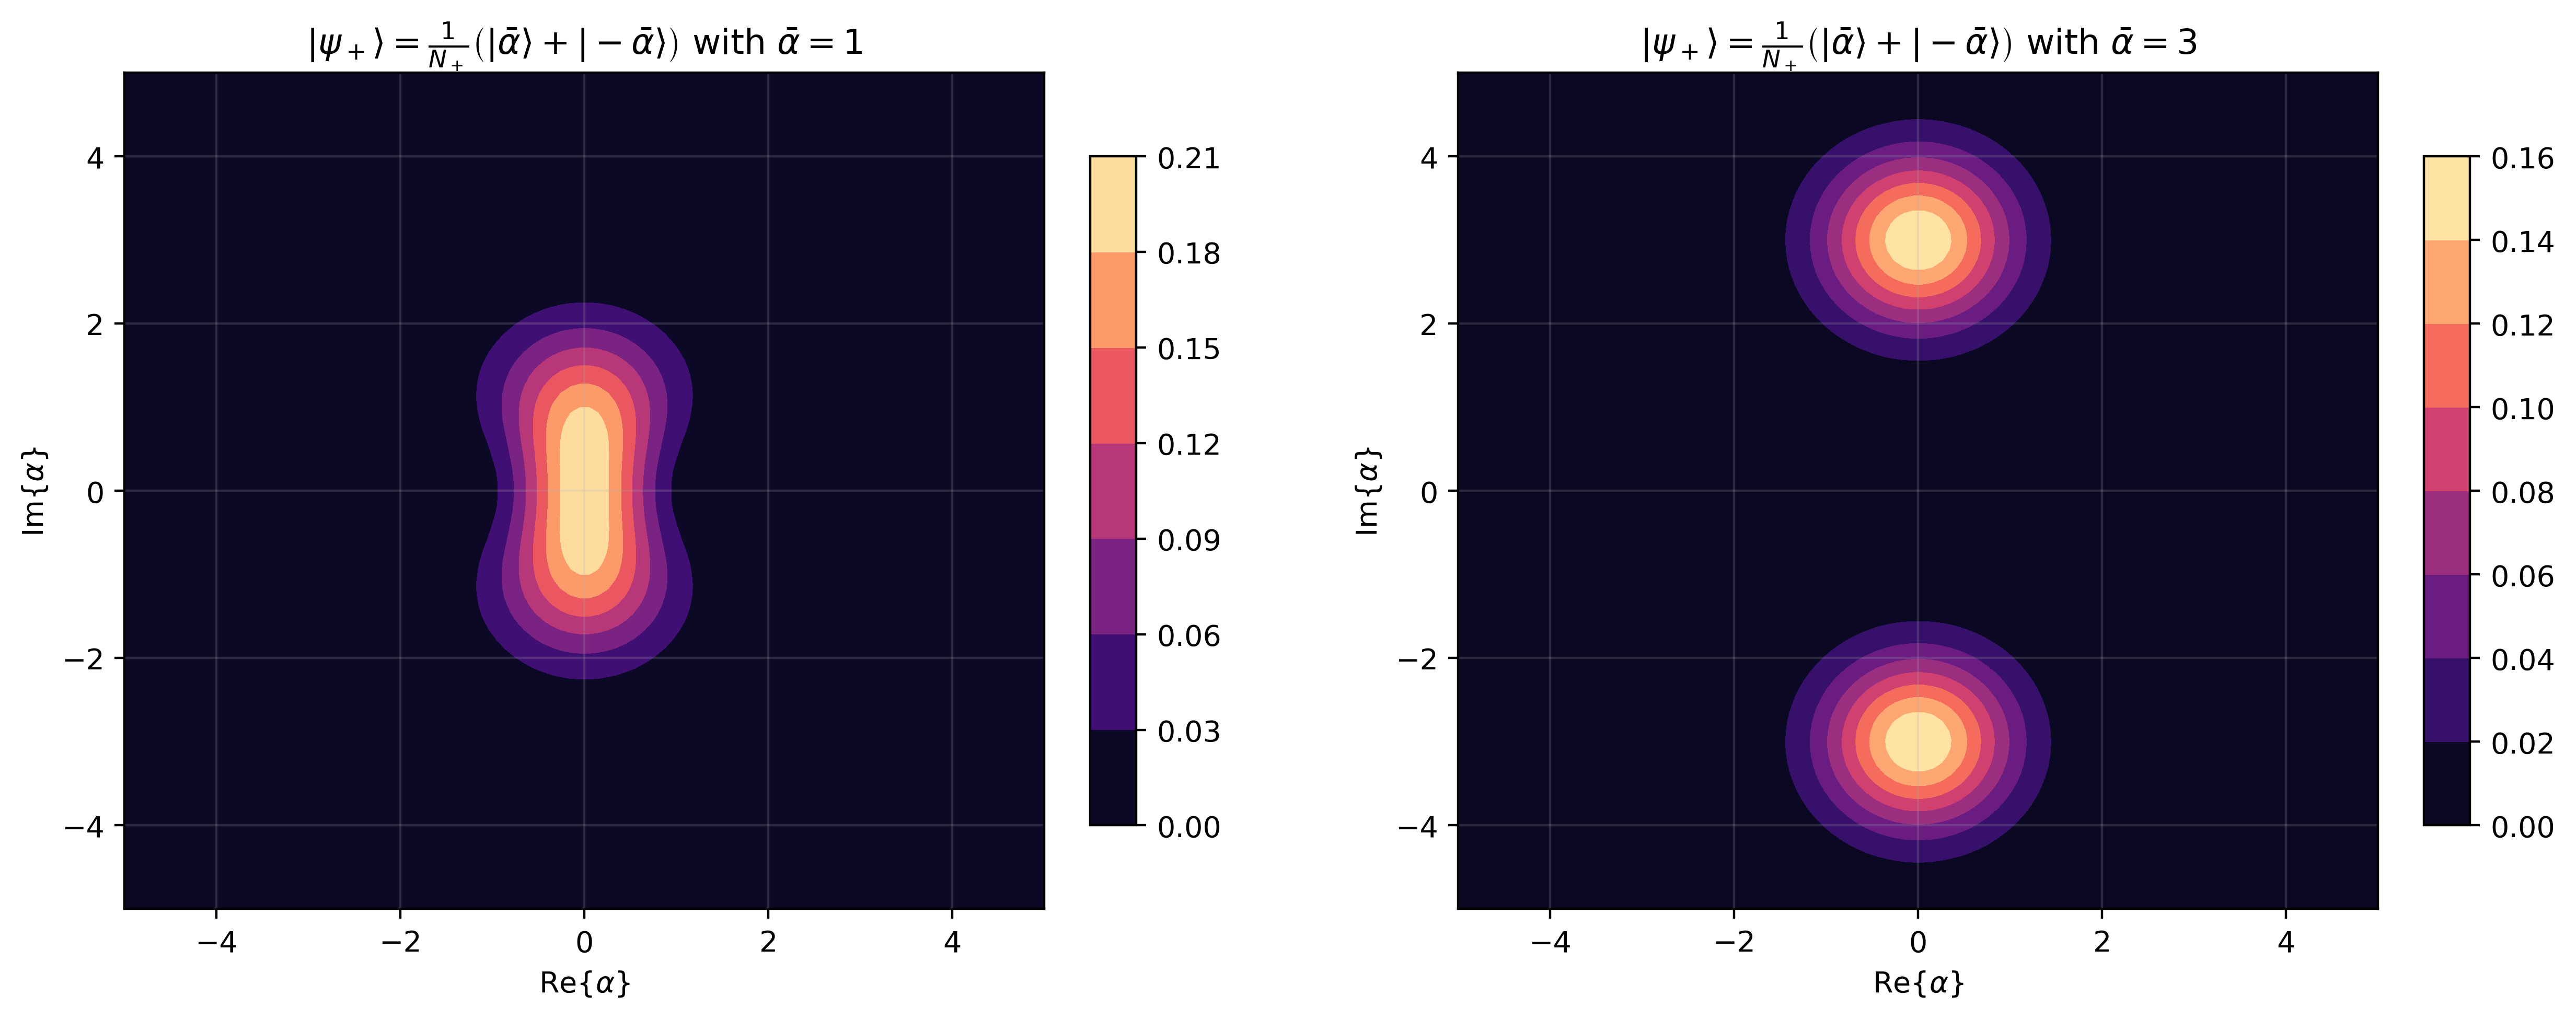

In [4]:
def Qb(alpha, state):
    a = np.exp(-(abs(alpha)**2 + abs(state)**2))
    b = 2 * np.pi * (1 + np.exp(-2 * abs(state)**2))
    alphas_prod = alpha.conjugate() * state
    c = np.exp(2 * alphas_prod.real) + np.exp(-2 * alphas_prod.real) + np.exp(2j * alphas_prod.imag) + np.exp(-2j * alphas_prod.imag)
    return np.real(a * c / b)

space_size = 100
x = np.linspace(-5, 5, space_size)
y = np.linspace(-5, 5, space_size)
xx, yy = np.meshgrid(x, y)

state = 1
z1 = np.zeros((space_size, space_size))
for i in range(space_size):
    for k in range(space_size):
        z1[i,k] = Qb(x[i]+1j*y[k], state)

fig = plt.figure(figsize=(11,4), dpi=400)

ax1= fig.add_axes([0, 0, 0.4, 1])
cont1 = ax1.contourf(xx, yy, z1, cmap = 'magma')
ax1.set_title(r'$|\psi_+\rangle = \frac{1}{N_+}\left(|\bar{\alpha}\rangle + |-\bar{\alpha}\rangle\right)$ with $\bar{\alpha}=1$')
ax1.set_xlabel(r'Re{$\alpha$}')
ax1.set_ylabel(r'Im{$\alpha$}')
ax1.grid(alpha=.2)

cbar_ax = fig.add_axes([0.42, 0.1, 0.02, 0.8])
fig.colorbar(cont1, cax=cbar_ax)

state2 = 3
z2 = np.zeros((space_size, space_size))
for i in range(space_size):
    for k in range(space_size):
        z2[i,k] = Qb(x[i]+1j*y[k], state2)

ax2= fig.add_axes([0.58, 0, 0.4, 1])
cont2 = ax2.contourf(xx, yy, z2, cmap = 'magma')
ax2.set_title(r'$|\psi_+\rangle = \frac{1}{N_+}\left(|\bar{\alpha}\rangle + |-\bar{\alpha}\rangle\right)$ with $\bar{\alpha}=3$')
ax2.set_xlabel(r'Re{$\alpha$}')
ax2.set_ylabel(r'Im{$\alpha$}')
ax2.grid(alpha=.2)

cbar_ax2 = fig.add_axes([1, 0.1, 0.02, 0.8])
fig.colorbar(cont2, cax=cbar_ax2)
plt.show()

(c) Consider the mixed state $$\hat{\rho} = \frac{1}{N_0}\left(|\bar{\alpha}\rangle\langle\bar{\alpha}| + |-\bar{\alpha}\rangle\langle-\bar{\alpha}| \right).$$ What is the value of $N_0$ that ensures that $\hat{\rho}$ is normalised? Derive the Q-function and make a contour plot for $\hat{\rho}$ for $\bar{\alpha}=1$ and $\bar{\alpha}=3$.

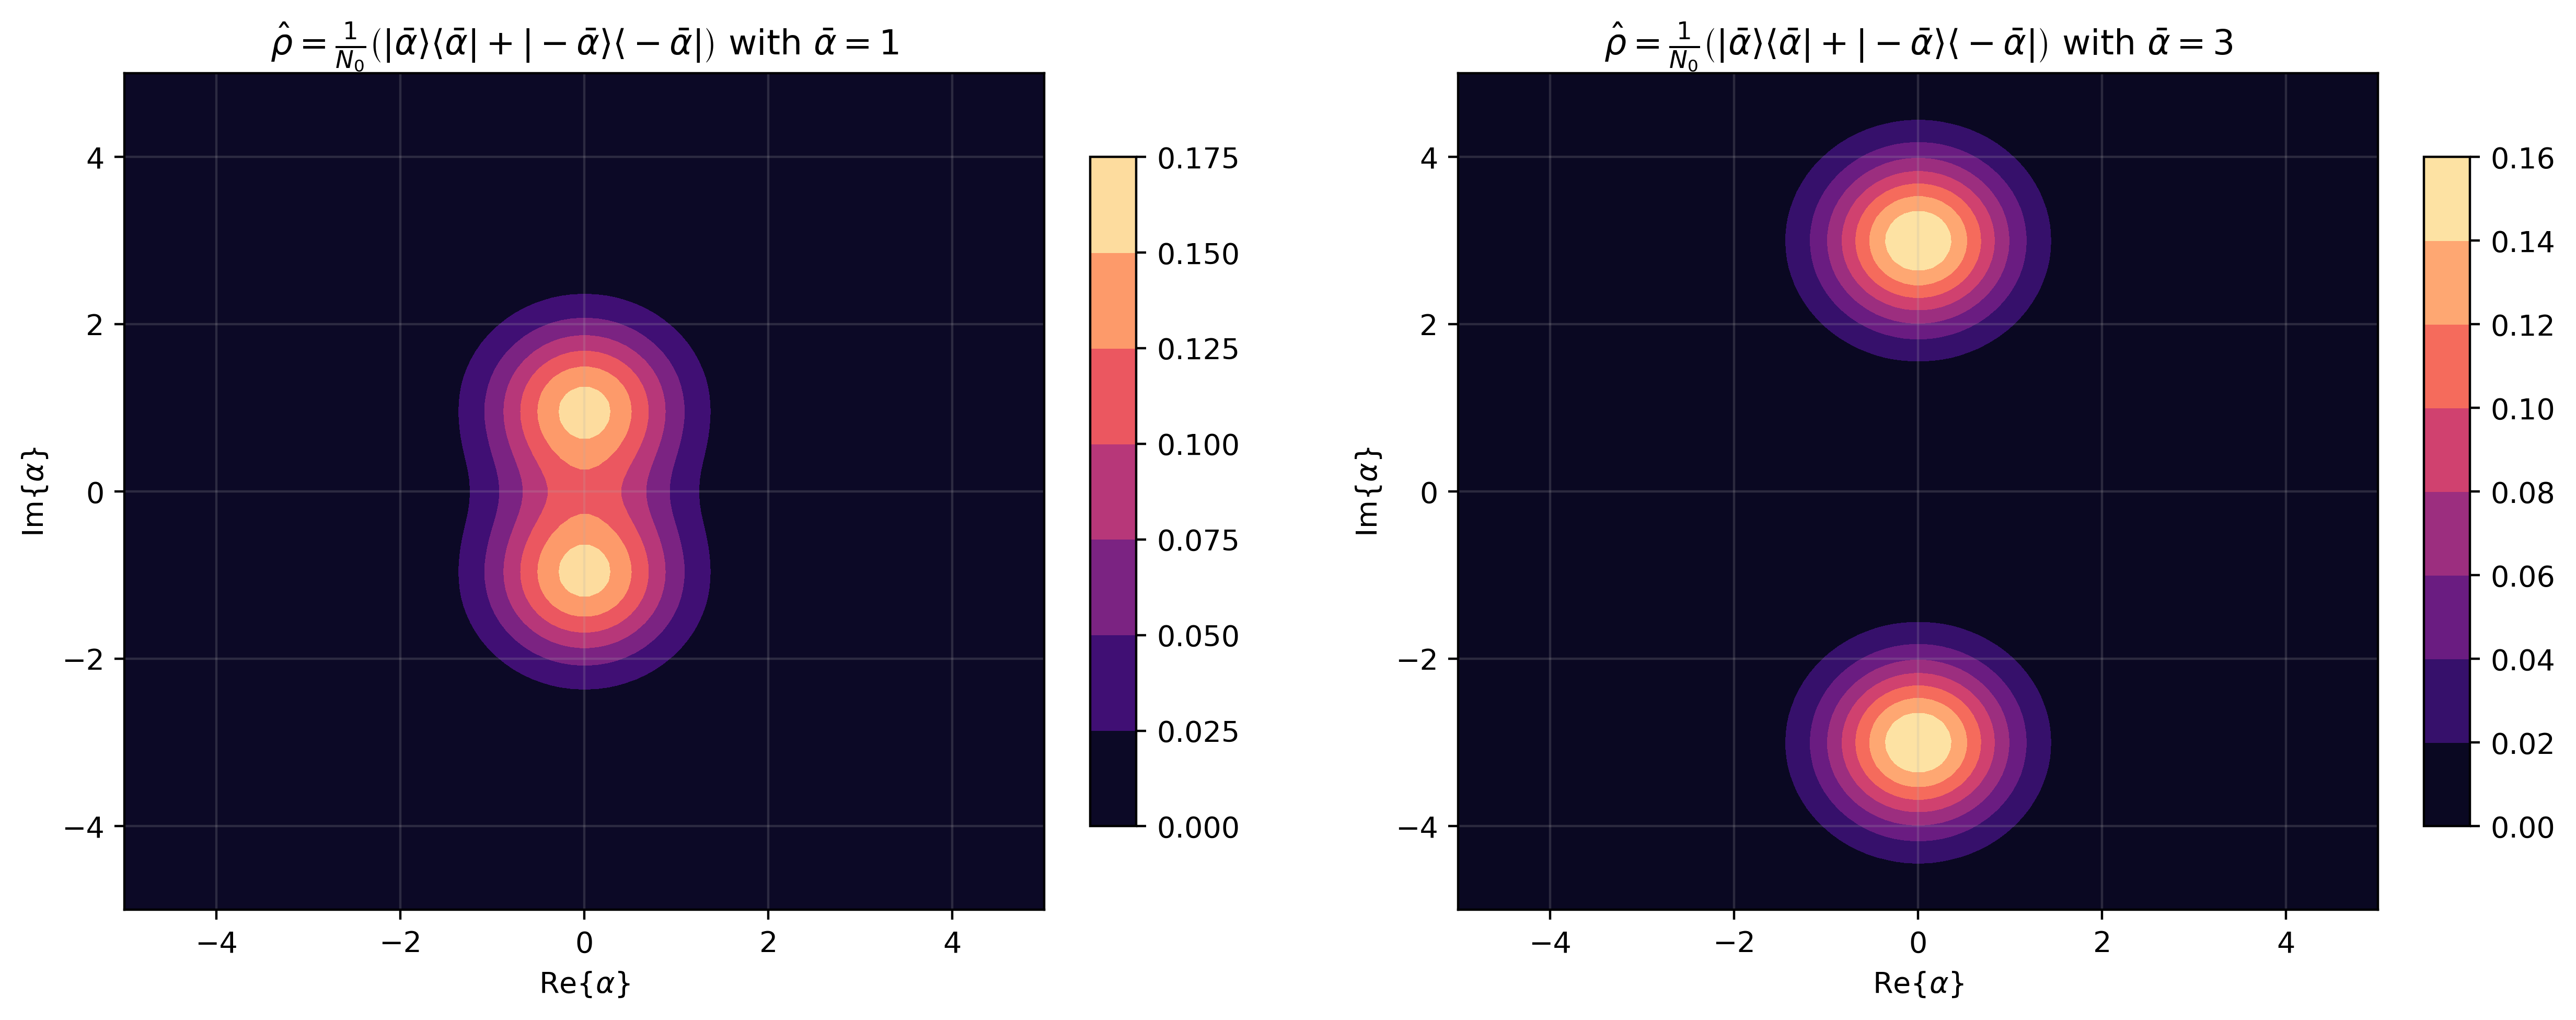

In [5]:
def Qc(alpha, state):
    a = np.exp(-abs(alpha-state)**2)
    b = np.exp(-abs(alpha+state)**2)
    return 1/(2*np.pi) * np.real(a + b)

space_size = 100
x = np.linspace(-5, 5, space_size)
y = np.linspace(-5, 5, space_size)
xx, yy = np.meshgrid(x, y)

state = 1
z1 = np.zeros((space_size, space_size))
for i in range(space_size):
    for k in range(space_size):
        z1[i,k] = Qc(x[i]+1j*y[k], state)

fig = plt.figure(figsize=(11,4), dpi=400)

ax1= fig.add_axes([0, 0, 0.4, 1])
cont1 = ax1.contourf(xx, yy, z1, cmap = 'magma')
ax1.set_title(r'$\hat{\rho} = \frac{1}{N_0}\left(|\bar{\alpha}\rangle\langle\bar{\alpha}| + |-\bar{\alpha}\rangle\langle-\bar{\alpha}| \right)$ with $\bar{\alpha}=1$')
ax1.set_xlabel(r'Re{$\alpha$}')
ax1.set_ylabel(r'Im{$\alpha$}')
ax1.grid(alpha=.2)

cbar_ax = fig.add_axes([0.42, 0.1, 0.02, 0.8])
fig.colorbar(cont1, cax=cbar_ax)

state2 = 3
z2 = np.zeros((space_size, space_size))
for i in range(space_size):
    for k in range(space_size):
        z2[i,k] = Qc(x[i]+1j*y[k], state2)

ax2= fig.add_axes([0.58, 0, 0.4, 1])
cont2 = ax2.contourf(xx, yy, z2, cmap = 'magma')
ax2.set_title(r'$\hat{\rho} = \frac{1}{N_0}\left(|\bar{\alpha}\rangle\langle\bar{\alpha}| + |-\bar{\alpha}\rangle\langle-\bar{\alpha}| \right)$ with $\bar{\alpha}=3$')
ax2.set_xlabel(r'Re{$\alpha$}')
ax2.set_ylabel(r'Im{$\alpha$}')
ax2.grid(alpha=.2)

cbar_ax2 = fig.add_axes([1, 0.1, 0.02, 0.8])
fig.colorbar(cont2, cax=cbar_ax2)
plt.show()

(d) Now consider a (normalised) cat state with the opposite phase $$|\psi_-\rangle = \frac{1}{N_-}\left(|\bar{\alpha}\rangle - |-\bar{\alpha}\rangle\right).$$ Derive the corresponding Q-function and make contour plots for $\bar{\alpha} = 1$ and $\bar{\alpha}=3$. 

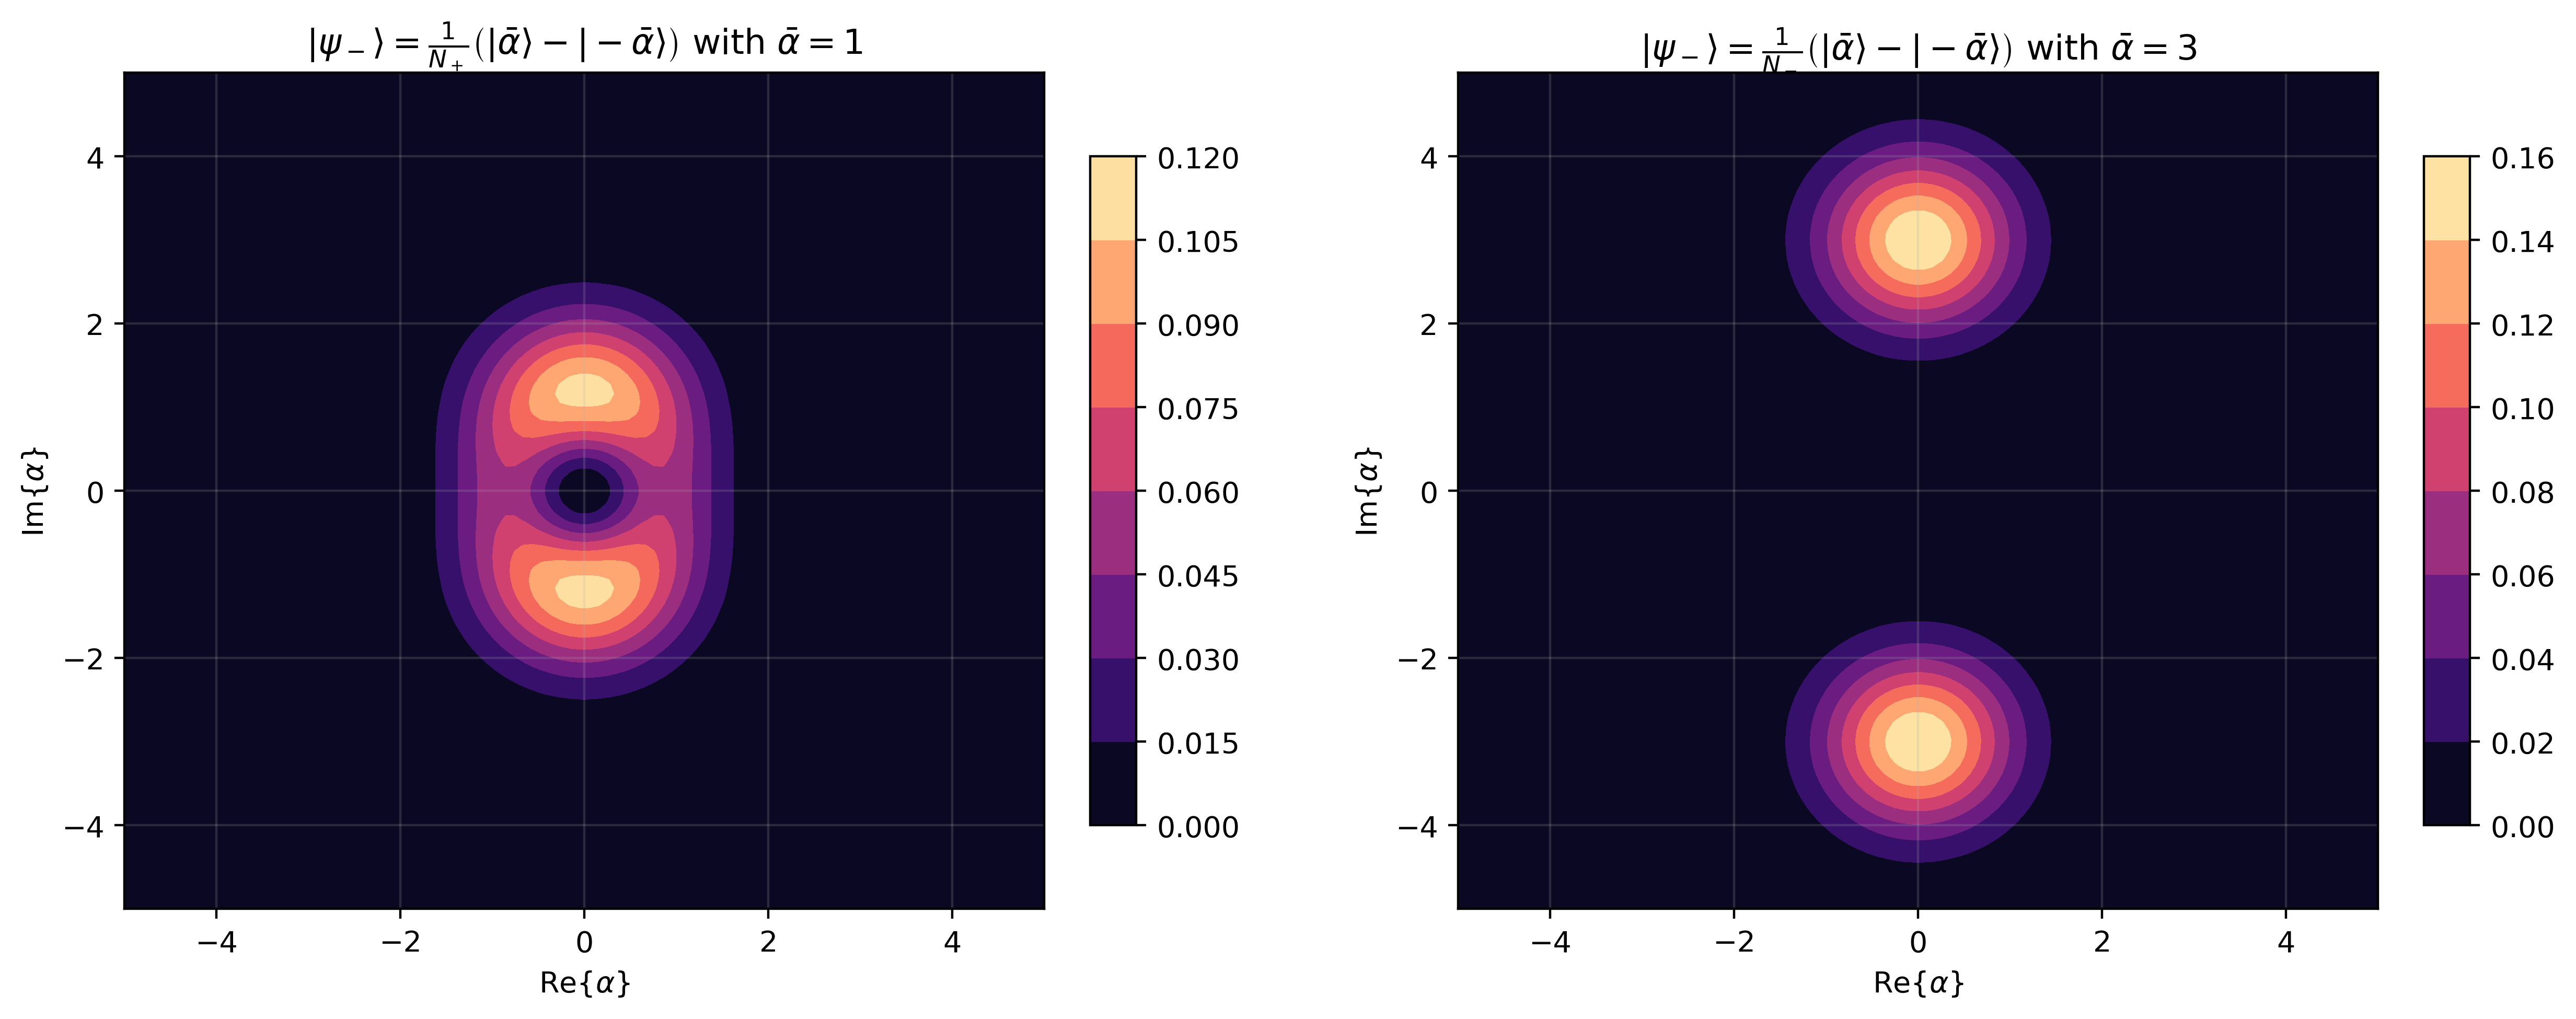

In [6]:
def Qd(alpha, state):
    a = np.exp(-(abs(alpha)**2 + abs(state)**2))
    b = 2 * np.pi * (1 + np.exp(-2 * abs(state)**2))
    alphas_prod = alpha.conjugate() * state
    c = np.exp(2 * alphas_prod.real) + np.exp(-2 * alphas_prod.real) - np.exp(2j * alphas_prod.imag) - np.exp(-2j * alphas_prod.imag)
    return np.real(a * c / b)

space_size = 100
x = np.linspace(-5, 5, space_size)
y = np.linspace(-5, 5, space_size)
xx, yy = np.meshgrid(x, y)

state = 1
z1 = np.zeros((space_size, space_size))
for i in range(space_size):
    for k in range(space_size):
        z1[i,k] = Qd(x[i]+1j*y[k], state)

fig = plt.figure(figsize=(11,4), dpi=400)

ax1= fig.add_axes([0, 0, 0.4, 1])
cont1 = ax1.contourf(xx, yy, z1, cmap = 'magma')
ax1.set_title(r'$|\psi_-\rangle = \frac{1}{N_-}\left(|\bar{\alpha}\rangle - |-\bar{\alpha}\rangle\right)$ with $\bar{\alpha}=1$')
ax1.set_xlabel(r'Re{$\alpha$}')
ax1.set_ylabel(r'Im{$\alpha$}')
ax1.grid(alpha=.2)

cbar_ax = fig.add_axes([0.42, 0.1, 0.02, 0.8])
fig.colorbar(cont1, cax=cbar_ax)

state2 = 3
z2 = np.zeros((space_size, space_size))
for i in range(space_size):
    for k in range(space_size):
        z2[i,k] = Qd(x[i]+1j*y[k], state2)

ax2= fig.add_axes([0.58, 0, 0.4, 1])
cont2 = ax2.contourf(xx, yy, z2, cmap = 'magma')
ax2.set_title(r'$|\psi_-\rangle = \frac{1}{N_-}\left(|\bar{\alpha}\rangle - |-\bar{\alpha}\rangle\right)$ with $\bar{\alpha}=3$')
ax2.set_xlabel(r'Re{$\alpha$}')
ax2.set_ylabel(r'Im{$\alpha$}')
ax2.grid(alpha=.2)

cbar_ax2 = fig.add_axes([1, 0.1, 0.02, 0.8])
fig.colorbar(cont2, cax=cbar_ax2)
plt.show()

(e) Write a short paragraph that compares and contrasts the results for (b), (c) and (d).

In the Husimi Q representation, if the states are in a superposition we see that they interfere with each other constructively or destructively when the phase is the same or $\pi$-shifted respectively (b and d). In the case of mixed states they do not interfere, just overlap (c).

## 5
The harmonic oscillator is infinite-dimensional and therefore its states and operators cannot be exactly represented by any numerical array. However, one can find an approximate representation by *truncation* of the Hilbert space to a finite size.
    
(a) Let $$\hat{a} = \sum_{n=1}^{d-1} \sqrt{n}|n-1\rangle\langle n|$$ be the approximate annihilation operator in the $d$-dimensional truncated Hilbert space. (This becomes the exact annihilation operator as $d\to\infty$.) For finite $d$, find an analytical expression for the operator $\hat{a}^\dagger \hat{a}$ and compute the commutator $[\hat{a},\hat{a}^\dagger]$.


(b) Define a Python function that generates the $d$-dimensional matrix representation of $\hat{a}$ for any integer $d$. For $d=5$, numerically test your function: check the commutation relation $[\hat{a},\hat{a}^\dagger]$ and confirm that $\hat{a}|4\rangle$ yields the correct result, where $|4\rangle$ is a Fock state. 

In [7]:
def anihilation(d):
    a = np.zeros((d, d))
    for i in range(d-1):
        a[i,i+1] = np.sqrt(i+1)
    return a

def fock(number, d):
    f = np.zeros((1, d))
    f[0, number] = 1
    return f.T

d=5 #d was understood as the maximum value of n (Fock state) considered in ex1 (as max_fock), here it is the dimensions of the Hilbert space
a = anihilation(d)
adag = a.T
print(a@adag - adag@a)
print(np.allclose(a@fock(4, d), np.sqrt(4)*fock(3, d))) #a|4> should give sqrt(4)|3>

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. -4.]]
True


(c) Write another function that outputs the truncated displacement operator $$\hat{D}(\alpha) = \exp \left[\alpha \hat{a}^\dagger - \alpha^* \hat{a} \right],$$ with arbitrary integer $d$ and complex $\alpha$ as inputs. Print its output for $\alpha = 0.5$ with $d=3$, $d=5$, and $d=10$. Comment on the difference between the results for different $d$. Is the truncated displacement operator unitary?

In [8]:
def displacement(alpha, d):
    a = anihilation(d)
    return expm(alpha * a.T - alpha.conjugate() * a)

dis = [displacement(0.5, i) for i in [3, 5, 10]]
Is = [np.eye(i, i) for i in [3, 5, 10]] #identities with the respective dimensions as de displacement operators
for i in range(3):
    #print(dis[i])
    print(np.allclose(dis[i] @ dis[i].T, Is[i])) #True if they are unitary


True
True
True


(d) Write a Python function that computes the Q-function $Q(\alpha)$ in the truncated Hilbert space, for any given complex value of $\alpha$ and an arbitrary $d$-dimensional pure state as input. Test your function by making a contour plot of the Q-function for a Fock state with $n=5$. Try to make your plot accurate (i.e., closely corresponding to the exact $d\to\infty$ result) without your code running for more than a couple of minutes! Comment your code to explain your parameter choices.

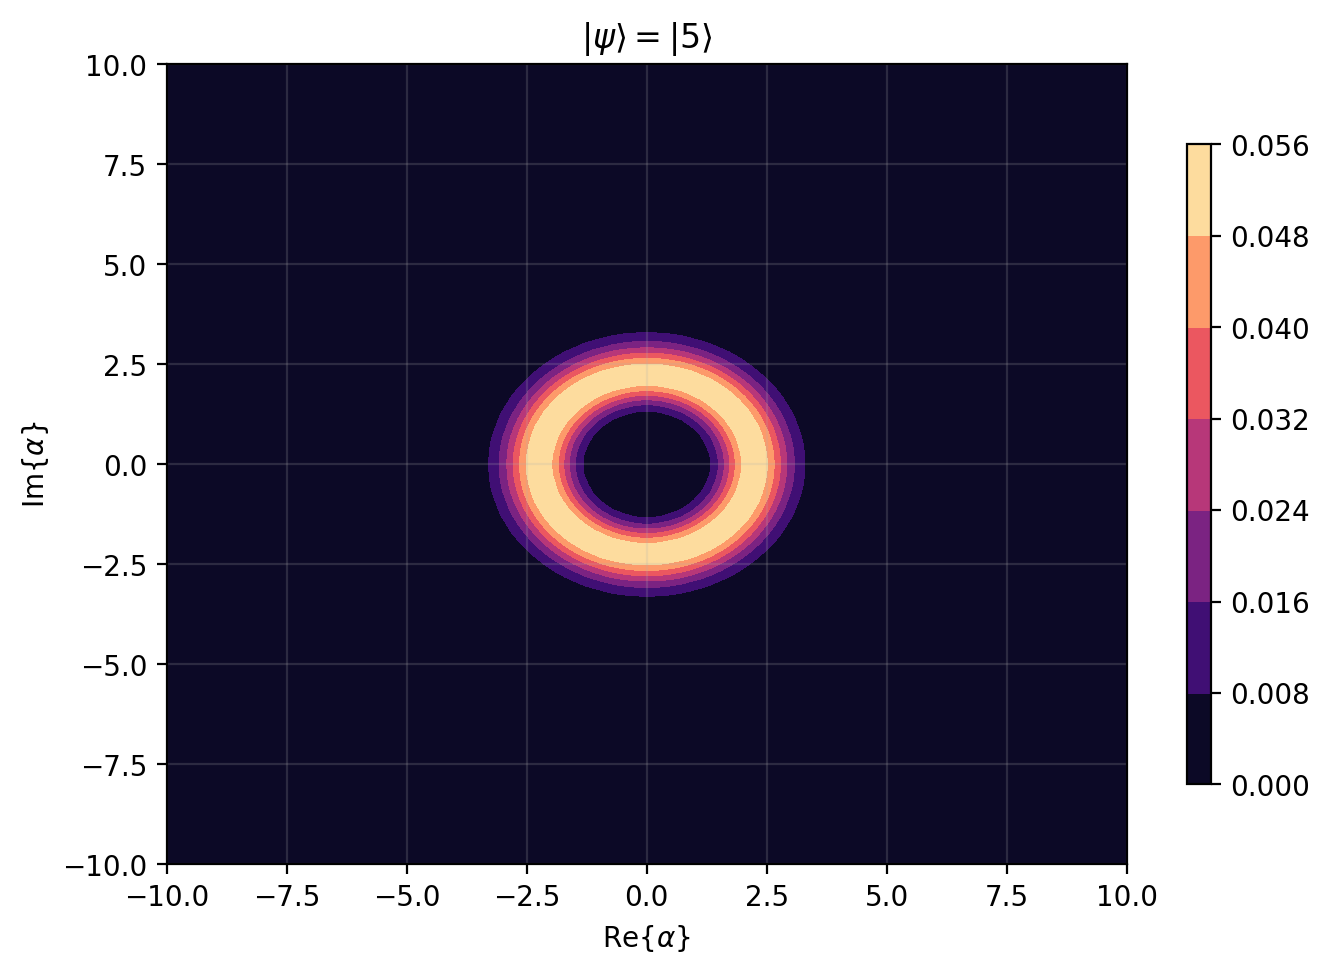

Wall time: 58.2 s


In [9]:
%%time


def fock(number, d):
    f = np.zeros((d, 1))
    f[number, 0] = 1
    return f

def displacement(alpha, d):
    a = anihilation(d)
    D = expm(alpha * a.T - alpha.conjugate() * a)
    return D

#first a function to calculate the Q-function at a specific point of the phase space
def Qdiscr(alpha, state, d):
    rho = state @ state.T.conjugate() #density matrix of the pure state
    D = displacement(alpha, d)
    alpha_state = D @ fock(0, d) #D(alpha)|0>=|alpha>
    return np.real(1/np.pi * alpha_state.T.conjugate() @ rho @ alpha_state)

#a function that creates a phase space, and plots the Q-function value at every point of it
def Q_plot(state, d):
    space_size = 100
    x = np.linspace(-10, 10, space_size)
    y = np.linspace(-10, 10, space_size)
    xx, yy = np.meshgrid(x, y)

    z1 = np.zeros((space_size, space_size))
    for i in range(space_size):
        for k in range(space_size):
            z1[i,k] = Qdiscr(x[i]+1j*y[k], state, d)

    fig = plt.figure(dpi=200)

    ax1= fig.add_axes([0, 0, 0.8, 1])
    cont1 = ax1.contourf(xx, yy, z1, cmap = 'magma')
    ax1.set_title(r'$|\psi\rangle =|5\rangle$')
    ax1.set_xlabel(r'Re{$\alpha$}')
    ax1.set_ylabel(r'Im{$\alpha$}')
    ax1.grid(alpha=.2)

    cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])
    fig.colorbar(cont1, cax=cbar_ax)
    plt.show()
    return x, y, z1
    
    
d=100
x, y, Q = Q_plot(fock(5, d), d)

## 6
Let us now apply the truncated Hilbert-space representation to study the dynamics of the driven quantum harmonic oscillator, described by the Hamiltonian from question 2:
$$ \hat{H} = \hbar\omega_0\hat{a}^\dagger\hat{a} + \hbar F\cos(\omega_{\rm d} t)\left(\hat{a}+\hat{a}^\dagger\right).$$

(a) Write a function that generates this Hamiltonian (for any given $t$) in a truncated Hilbert space with $d=16$.

In [10]:
def H(w0, wd, F, t, d=16):
    a = anihilation(d)
    adag = a.T
    return (w0 * adag @ a) + (F * np.cos(wd * t) * (a + adag))

(b) Numerically calculate the dynamics of the quantum state in the Schrödinger picture starting from the vacuum state $|\psi(0)\rangle = |0\rangle$, and plot the mean value of the coordinate, $\langle \hat{q}(t)\rangle,$ as a function of time up to $\omega_0 t=100$.  Choose parameters $F=0.1\omega_0$ and $\omega_{\rm d} = 0.99\omega_0$.  (Recall that Worksheet 1 explored techniques to numerically calculate time evolution.)

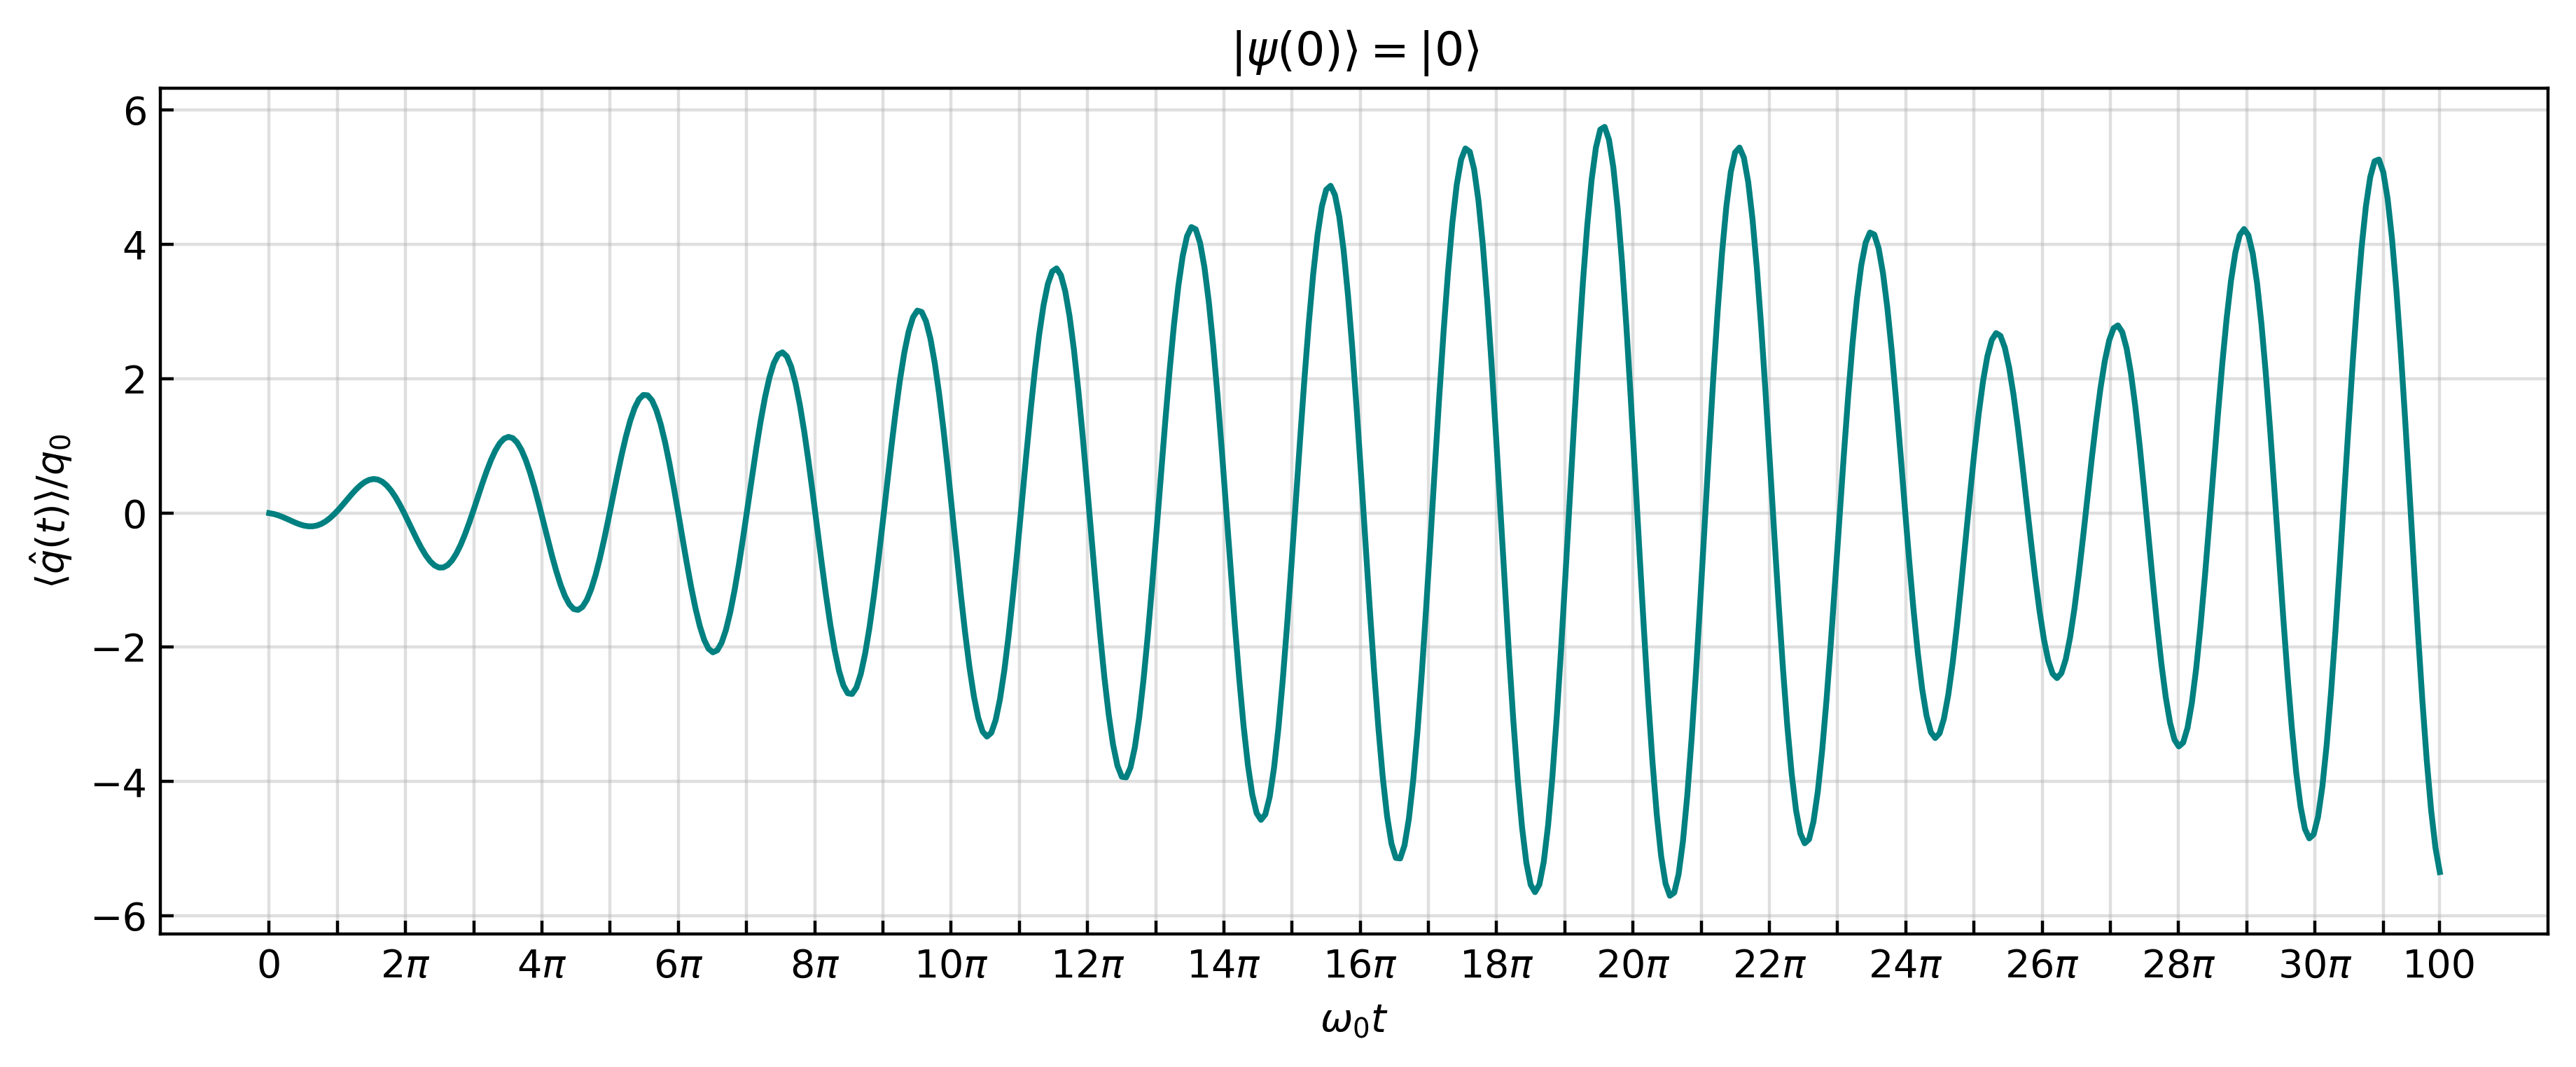

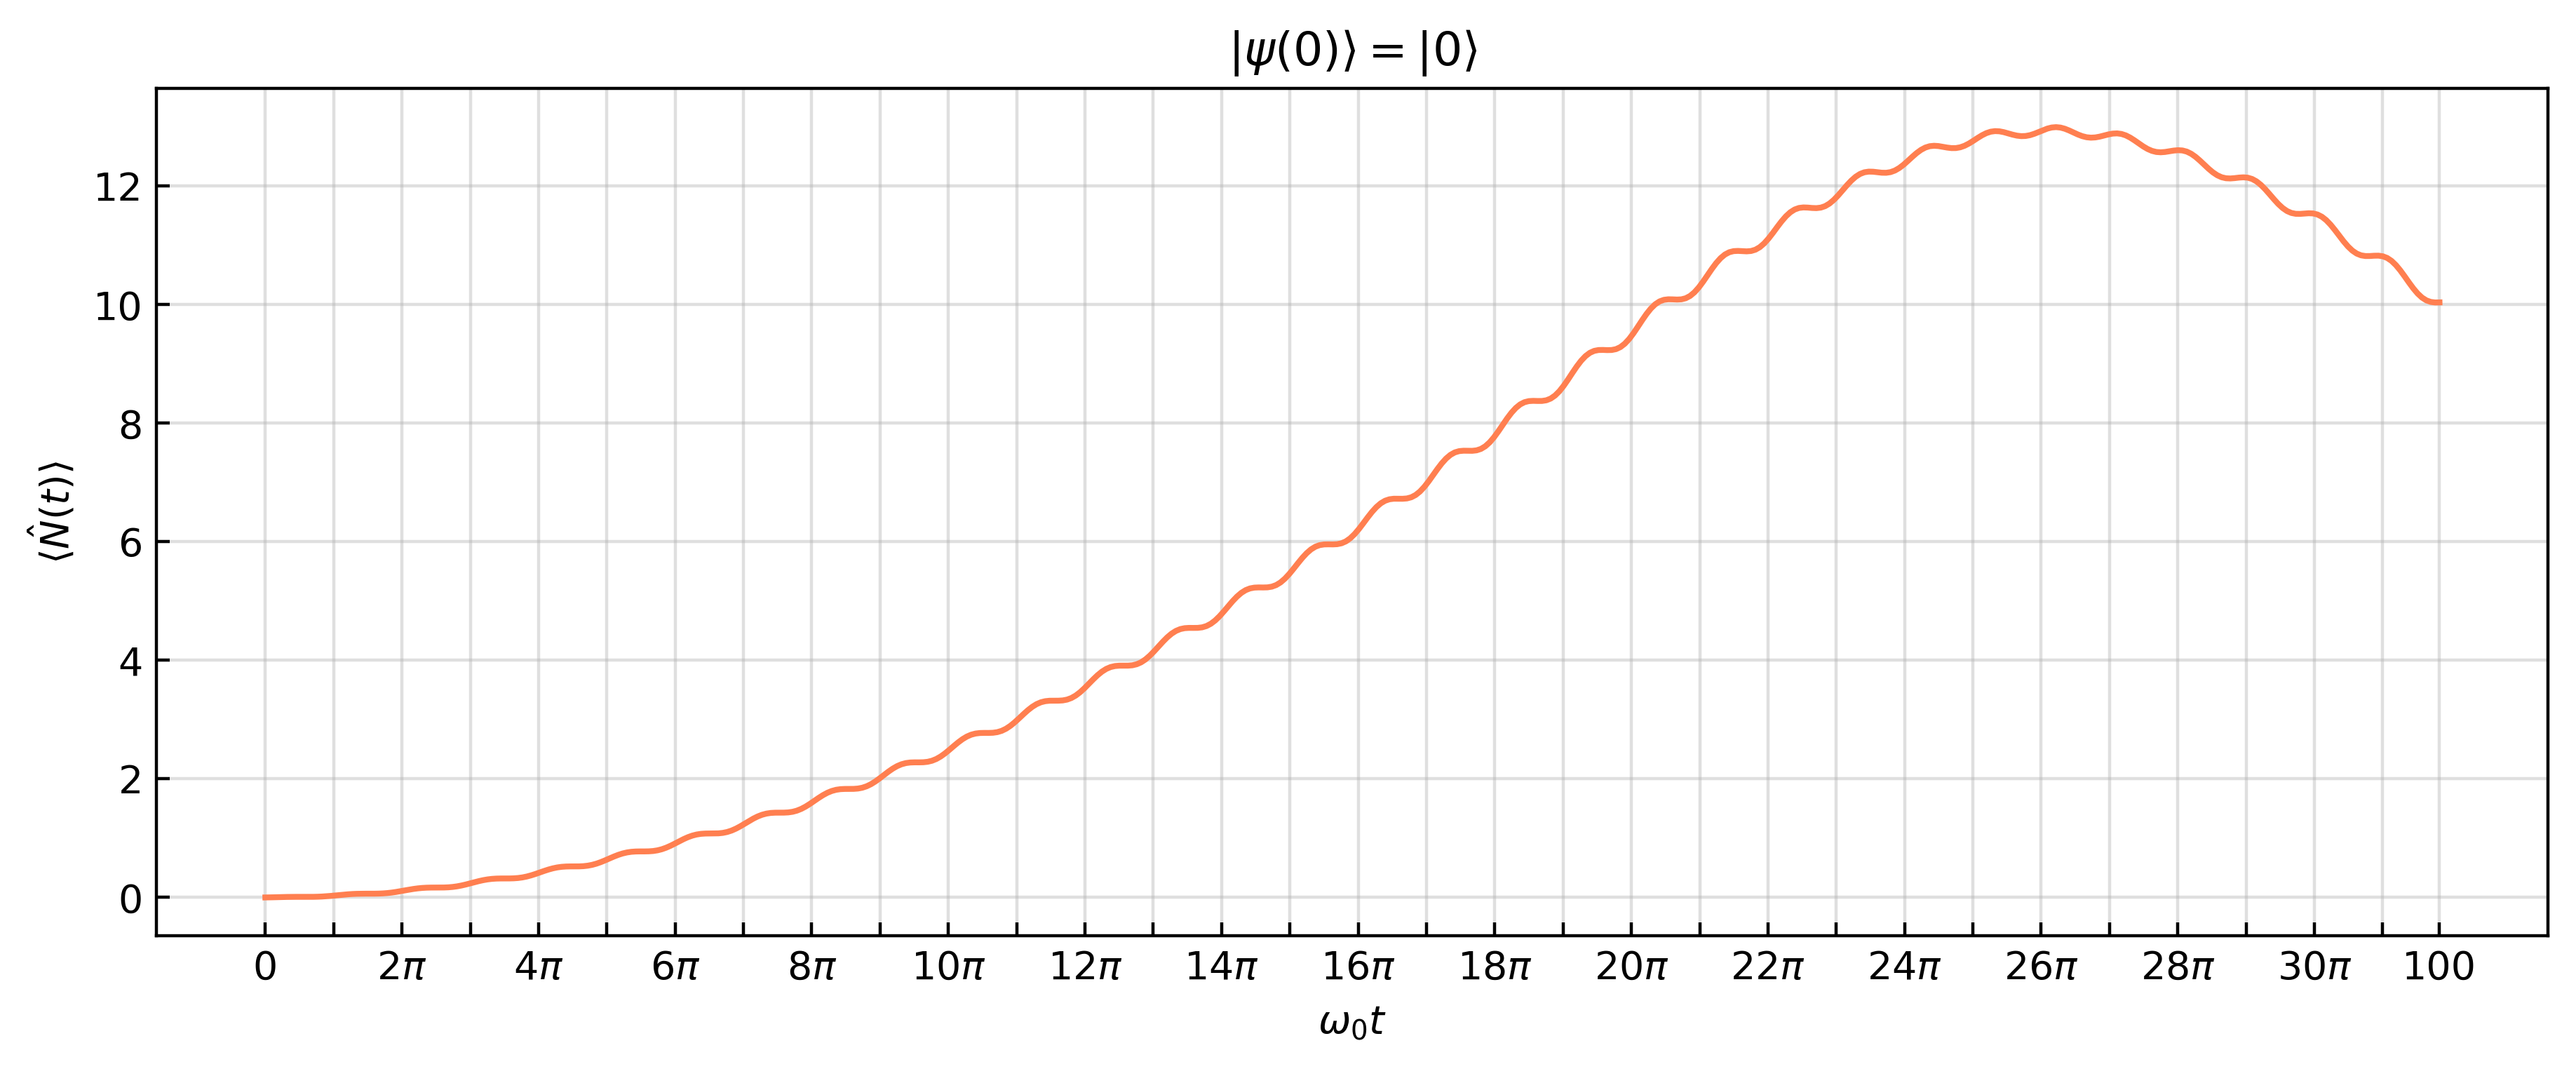

In [11]:
max_f = 16 #dimension=16
state = fock(0, max_f)

w0 = 1

time_size = 500
t = np.linspace(0, 100/w0, time_size)

F = 0.1*w0
wd = .99*w0

dt = t[1]-t[0]
states = [] #list with the state at every time
for i in range(time_size):
    state = expm(-1j * dt * H(w0, wd, F, t[i], max_f)) @ state #this is the evolved state at time t
    states.append(state)
    
a = anihilation(max_f)

adag = a.T
exp_q = []
exp_N = []

for i in states:
    exp_q.append(float((i.T.conjugate() @ (a + adag) @ i).real))
    exp_N.append(float((i.T.conjugate() @ (adag@a) @ i).real))

plt.figure(figsize = (11, 4), dpi = 400)
plt.tick_params(axis="both", direction="in")
plt.plot([i*w0 for i in t], exp_q, c='teal')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle \hat{q}(t) \rangle/q_0$')
plt.title(r'$|\psi(0)\rangle = |0\rangle$')
plt.xticks([i*np.pi for i in range(0, 32)]+[100], ['0']+[r'$'+str(i)+'\pi$' if i%2==0 else '' for i in range(1,32)] + ['100'])
plt.grid(alpha=0.4)
plt.show()


plt.figure(figsize = (11, 4), dpi = 400)
plt.tick_params(axis="both", direction="in")
plt.plot([i*w0 for i in t], exp_N, c='coral')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle \hat{N}(t) \rangle$')
plt.title(r'$|\psi(0)\rangle = |0\rangle$')
plt.xticks([i*np.pi for i in range(0, 32)]+[100], ['0']+[r'$'+str(i)+'\pi$' if i%2==0 else '' for i in range(1,32)] + ['100'])
plt.grid(alpha=0.4)
plt.show()


(c) Repeat the same calculation but with the Hamiltonian 
$$ \hat{H} = \hbar\omega_0\hat{a}^\dagger\hat{a} + \hbar F\cos(\omega_{\rm d} t)\left(\hat{a}+\hat{a}^\dagger\right) + \hbar U (\hat{a}^\dagger \hat{a})^2,$$
with $U=0.2\omega_0$ and other parameters the same as in (b).

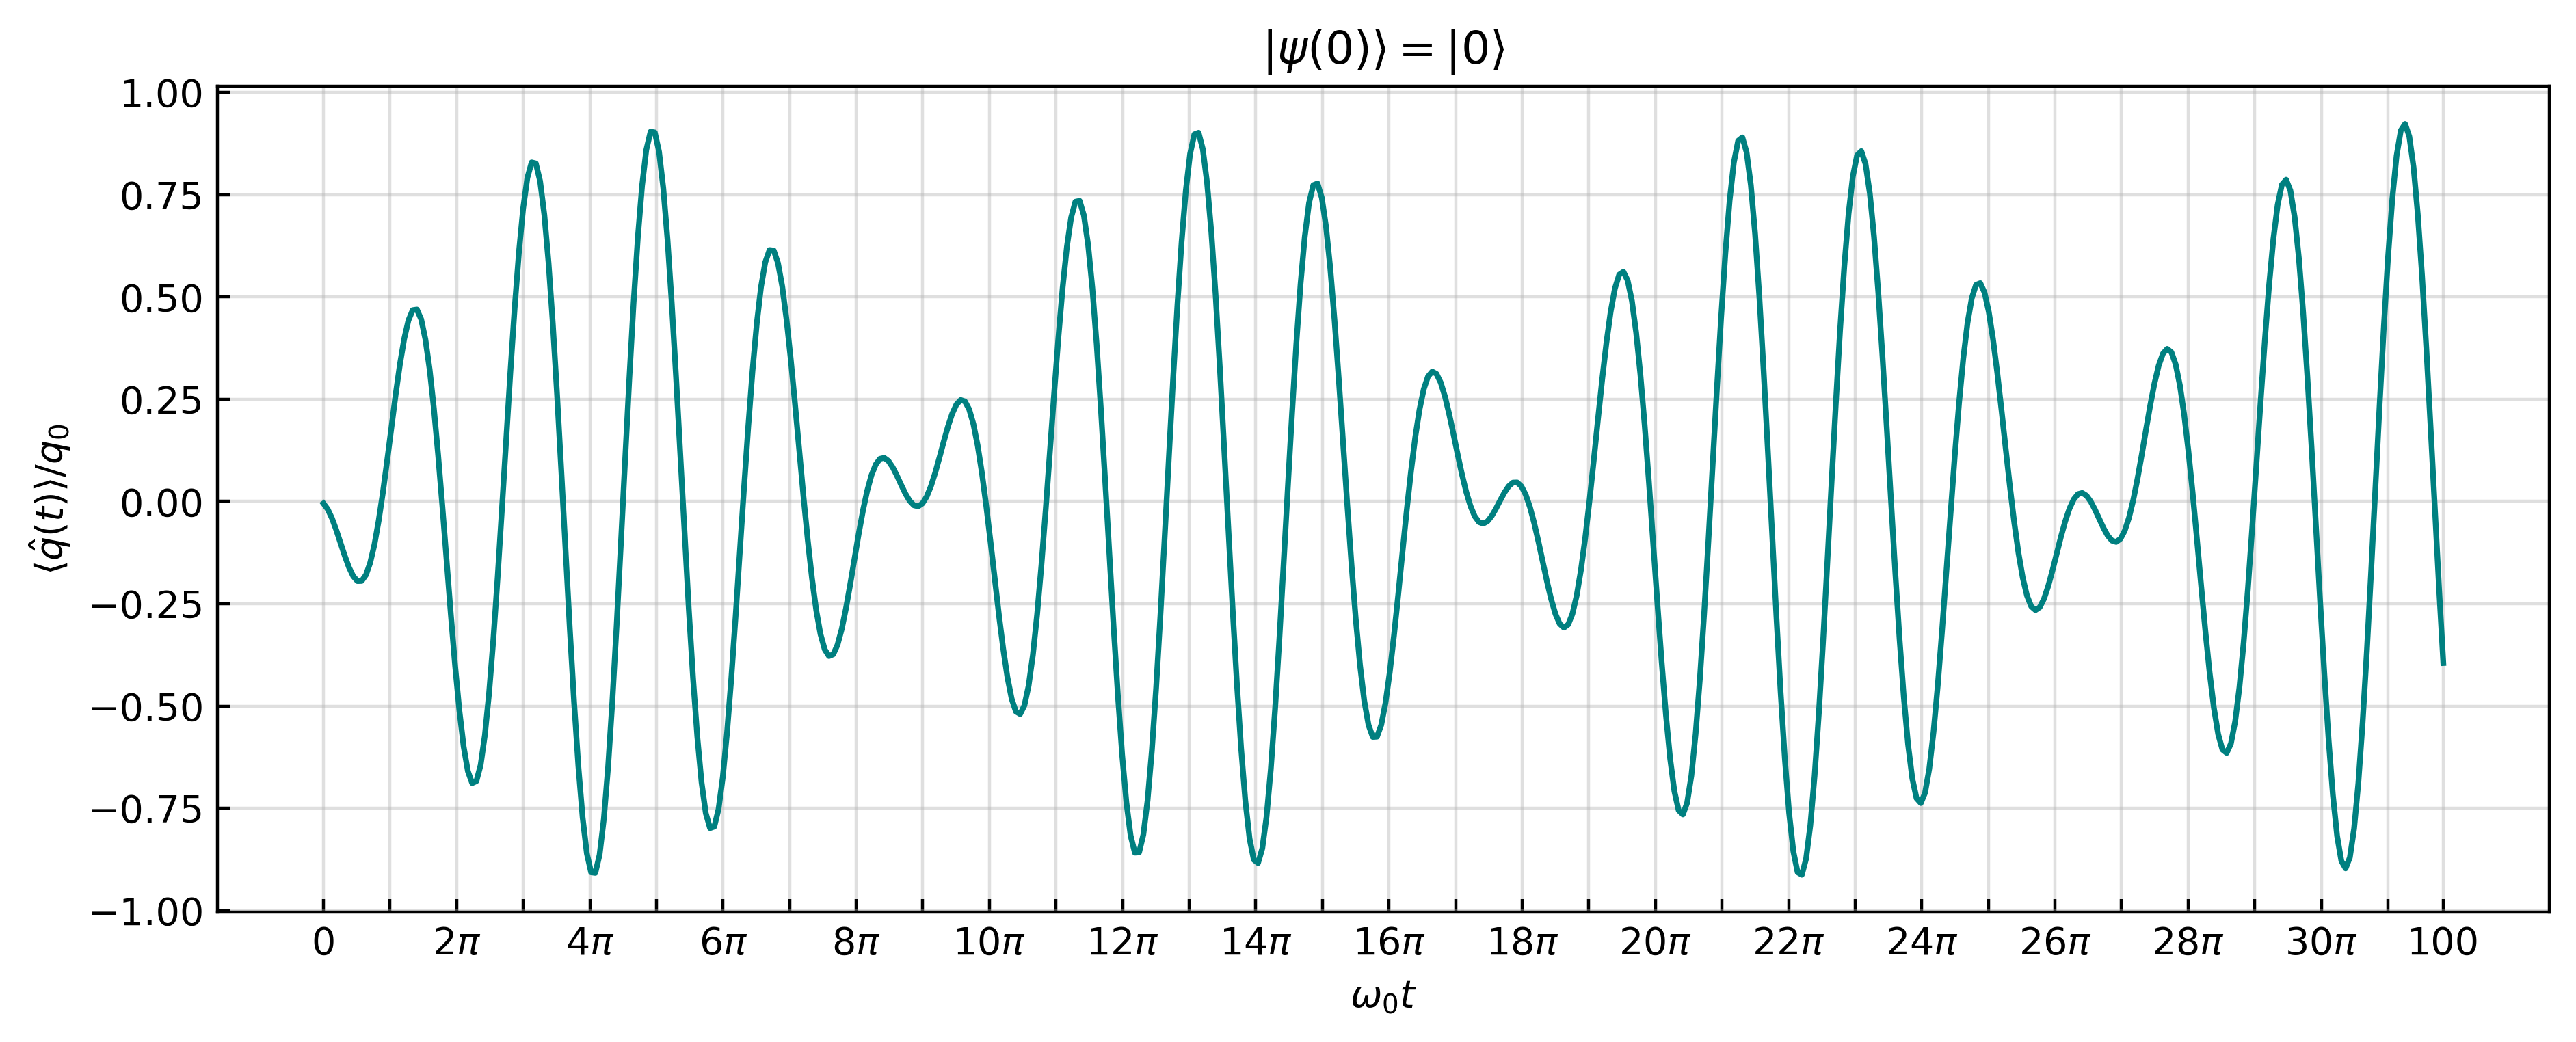

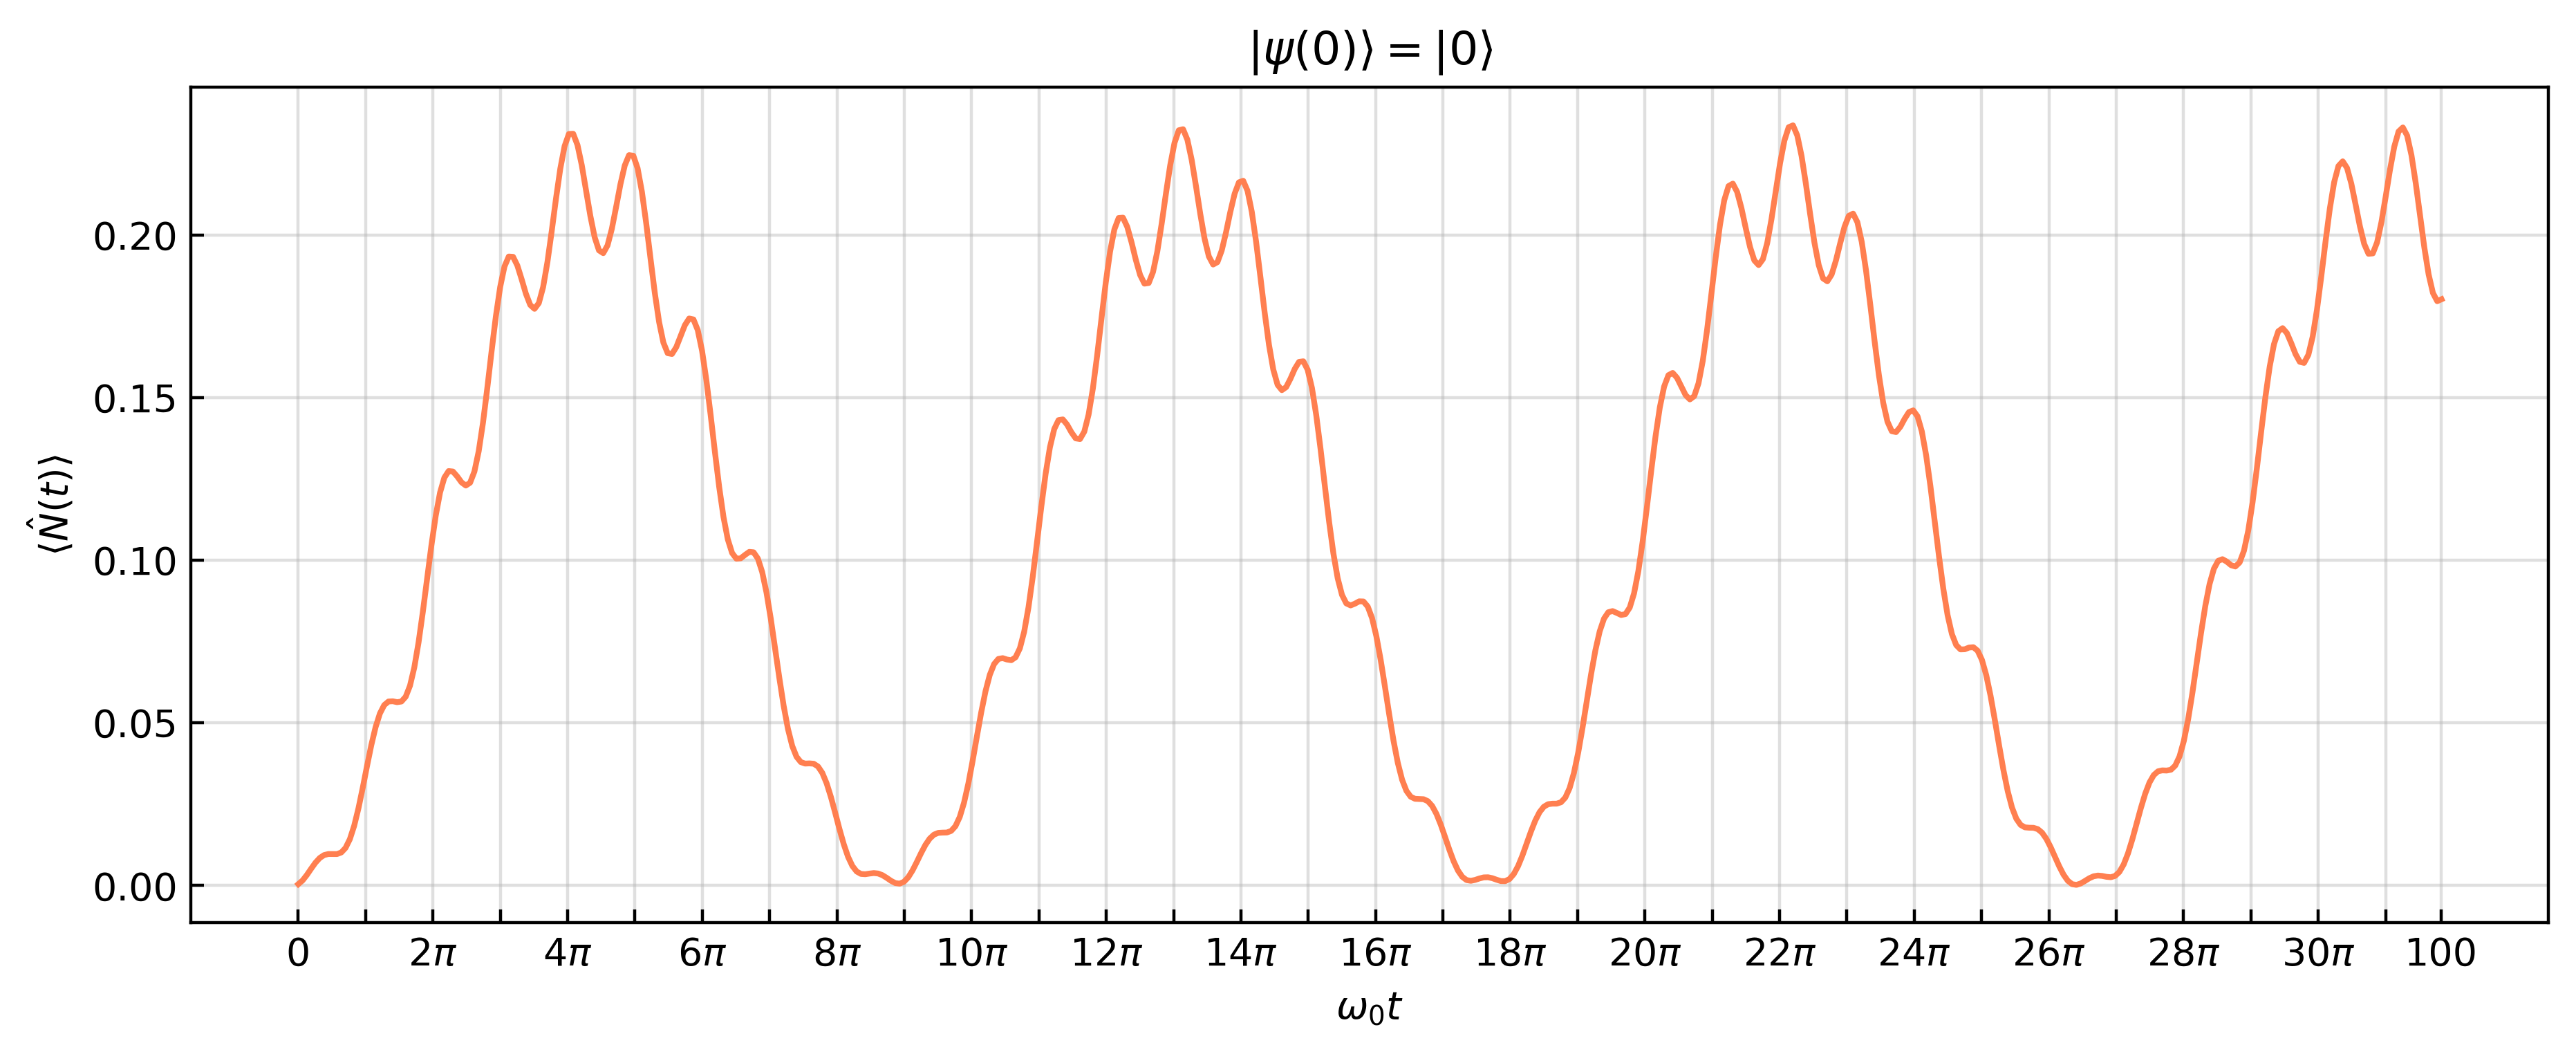

In [12]:
def H_6c(w0, wd, F, U, t, d=16):
    a = anihilation(d) 
    adag = a.T
    N = adag @ a
    return (w0 * N) + (F * np.cos(wd * t) * (a + adag)) + U * N @ N


max_f = 16 #maximum fock state for dimension=16
state = fock(0, max_f)

w0 = 1
time_size = 500
t = np.linspace(0, 100/w0, time_size)

F = 0.1*w0
wd = 0.99*w0
U = 0.2*w0

dt = t[1]-t[0]
states = [] #list with the state at every time
for i in range(time_size):
    state = expm(-1j * dt * H_6c(w0, wd, F, U, t[i], max_f)) @ state #this is the evolved state at time t
    states.append(state)
    
a = anihilation(max_f)

adag = a.T
exp_q = []
exp_N = []

for i in states:
    exp_q.append(float((i.T.conjugate() @ (a + adag) @ i).real))
    exp_N.append(float((i.T.conjugate() @ (adag@a) @ i).real))

plt.figure(figsize = (11, 4), dpi = 400)
plt.tick_params(axis="both", direction="in")
plt.plot([i*w0 for i in t], exp_q, c='teal')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle \hat{q}(t) \rangle/q_0$')
plt.title(r'$|\psi(0)\rangle = |0\rangle$')
plt.xticks([i*np.pi for i in range(0, 32)]+[100], ['0']+[r'$'+str(i)+'\pi$' if i%2==0 else '' for i in range(1,32)] + ['100'])
plt.grid(alpha=0.4)
plt.show()


plt.figure(figsize = (11, 4), dpi = 400)
plt.tick_params(axis="both", direction="in")
plt.plot([i*w0 for i in t], exp_N, c='coral')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle \hat{N}(t) \rangle$')
plt.title(r'$|\psi(0)\rangle = |0\rangle$')
plt.xticks([i*np.pi for i in range(0, 32)]+[100], ['0']+[r'$'+str(i)+'\pi$' if i%2==0 else '' for i in range(1,32)] + ['100'])
plt.grid(alpha=0.4)
plt.show()


(d) Comment on the numerical accuracy and physical meaning of your results for (b) and (c).

When the truncated space considers the main dimensions of the present Fock states, we can confirm that the approximation is accurate. As we can see in the plots of $\langle \hat{N}(t) \rangle$, for (b) it almost reaches the limit, so the approximation is not accurate, considering more dimensions will improve it. On the other hand, (c) is accurate because $\langle \hat{N}(t) \rangle$ is always far from the truncation limit.
Physically we can observe that the expected position of the vacuum state under driven quantum harmonic oscillators (with and without quadratic terms with respect to $\hat{N}$) corresponds to a vibration (or oscillation) similar to that of a classical charged particle under an electromagnetic wavepacket.
The presence of the quadratic term increases the frequency of the vibrations.

## 7 
Another useful way to simulate *quadratic* Hamiltonians is to use the linearity of the Heisenberg equations. As in question 4, consider a two-mode system with annihilation operators $\hat{a}_1$ and $\hat{a}_2$. Convince yourself that the Hamiltonian can be written as a vector-matrix-vector product ([a quadratic form](https://en.wikipedia.org/wiki/Quadratic_form))
$$\hat{H}  = \mathbf{\hat{a}}^\dagger\cdot \mathbf{H} \cdot \mathbf{\hat{a}} = \sum_{j,k} H_{jk} \hat{a}_j^\dagger \hat{a}_k= 
\begin{pmatrix} \hat{a}_1^\dagger & \hat{a}_2^\dagger \end{pmatrix} \cdot \begin{pmatrix}
\hbar\omega_1  & \hbar g/2 \\ \hbar g/2 & \hbar\omega_2 \end{pmatrix}\cdot \begin{pmatrix} \hat{a}_1 \\ \hat{a}_2 \end{pmatrix},$$
where all three expressions above are just different ways of writing the same thing, with
$$ \mathbf{\hat{a}} = \begin{pmatrix} \hat{a}_1 \\ \hat{a}_2 \end{pmatrix},\qquad \mathbf{\hat{a}}^\dagger = \begin{pmatrix} \hat{a}_1^\dagger & \hat{a}_2^\dagger \end{pmatrix}, \qquad \mathbf{H} = \begin{pmatrix}
\hbar\omega_1  & \hbar g/2 \\ \hbar g/2 & \hbar\omega_2 \end{pmatrix},$$
while $H_{jk}$ are the elements of the $2\times 2$ Hermitian matrix $\mathbf{H}$.

(a) Consider the displacement vector $$\mathbf{d} = \begin{pmatrix}\langle \hat{a}_1 \rangle \\
\langle \hat{a}_2\rangle\end{pmatrix},$$
and the correlation matrix $$\mathbf{C} = \begin{pmatrix}\langle\!\langle \hat{a}_1^\dagger \hat{a}_1 \rangle\!\rangle & \langle\!\langle \hat{a}_2^\dagger \hat{a}_1 \rangle\!\rangle \\
\langle\!\langle \hat{a}_1^\dagger \hat{a}_2 \rangle\!\rangle &\langle\!\langle\hat{a}_2^\dagger \hat{a}_2 \rangle\!\rangle
\end{pmatrix},$$
or, equivalently, $d_j = \langle a_j\rangle$ and $C_{jk} = \langle\!\langle \hat{a}_k^\dagger \hat{a}_j\rangle\!\rangle = \langle \hat{a}_k^\dagger \hat{a}_j\rangle - \langle \hat{a}_k^\dagger\rangle\langle\hat{a}_j\rangle$ (note the order of indices $j,k$!). Use the Heisenberg equations to show that
$$ \frac{\rm d}{\rm dt}\mathbf{d} = \frac{1}{{\rm i}\hbar}\mathbf{H}\cdot \mathbf{d},\qquad  \frac{\rm d}{\rm dt} \mathbf{C} = \frac{1}{{\rm i}\hbar}[\mathbf{H},\mathbf{C}].$$ 

(b) Convince yourself that the solutions to the above equations are $$\mathbf{d}(t) = \mathbf{V}(t)\cdot\mathbf{d}(0),\qquad \mathbf{C}(t) = \mathbf{V}(t)\cdot\mathbf{C}(0)\cdot\mathbf{V}^\dagger(t),$$ where $\mathbf{V}(t) = {\rm e}^{-{\rm i}\mathbf{H} t/\hbar}$ is a unitary matrix. Therefore, the dynamics can be simulated using the same iterative method as we have previously used for qubits in Worksheet 1, since $$\mathbf{d}(t +\Delta t) = \mathbf{V}(\Delta t) \cdot \mathbf{d}(t), \qquad \mathbf{C}(t+\Delta t) = \mathbf{V}(\Delta t)\cdot\mathbf{C}(t)\cdot\mathbf{V}^\dagger(\Delta t).$$ Use this method to calculate the dynamics of the system numerically, starting from the product state 
$$|\psi(0)\rangle = |4\rangle \otimes |0\rangle,$$
corresponding to a state with 4 energy quanta in mode 1 and 0 quanta in mode 2. Generate plots of the mean coordinate $\langle \hat{q}_j(t)\rangle$ and the mean occupation number $\langle \hat{n}_j(t)\rangle$ for both modes, $j=1,2$. Choose parameters $\omega_2=0.9\omega_1$, $g=0.3\omega_1$, and evolve up to a time $\omega_1t = 50$.

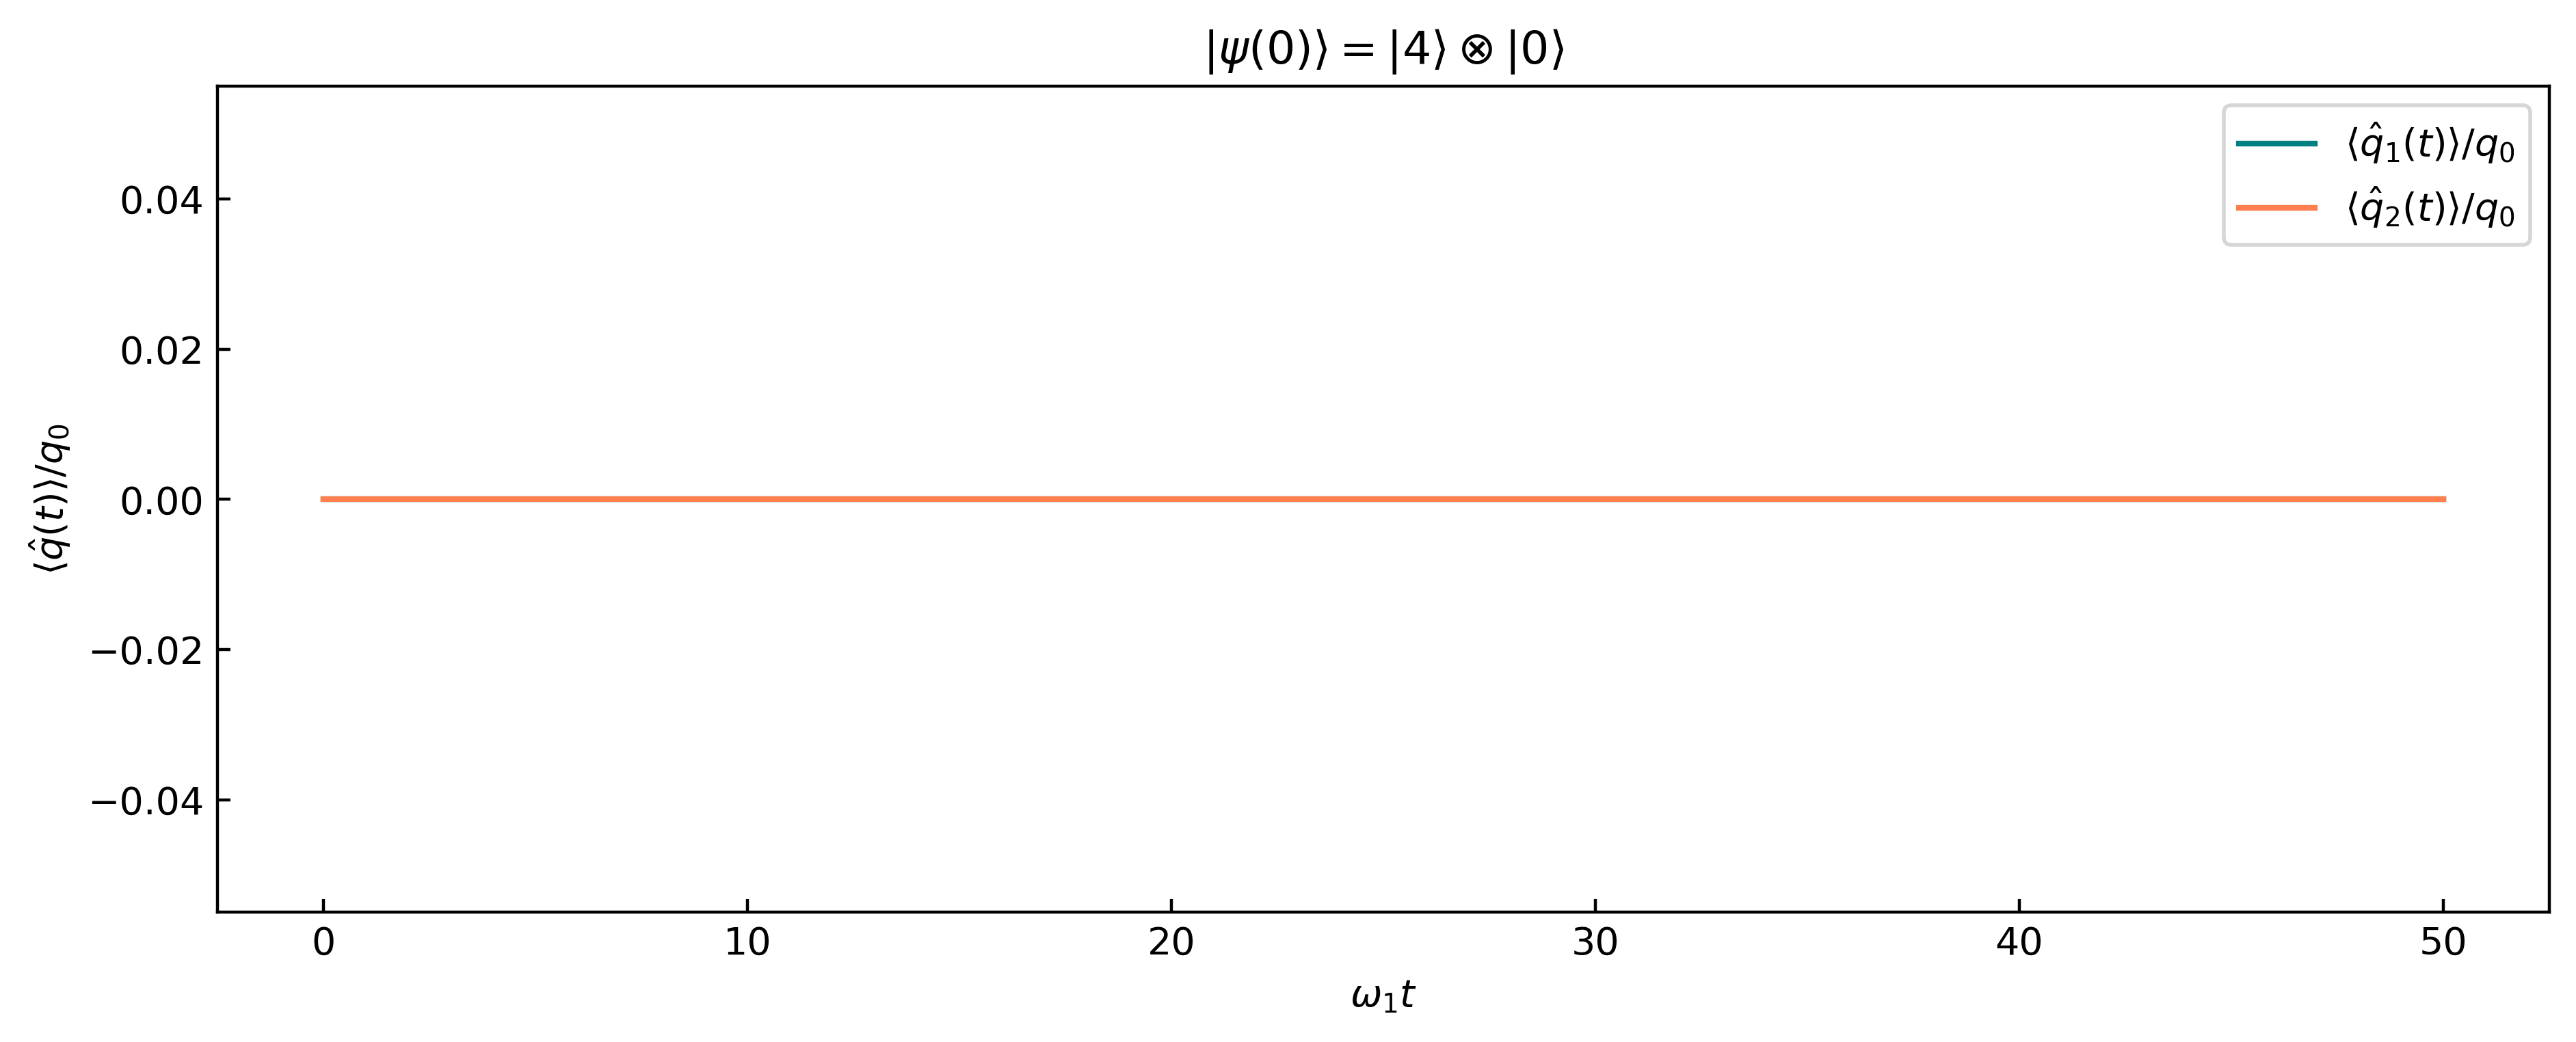

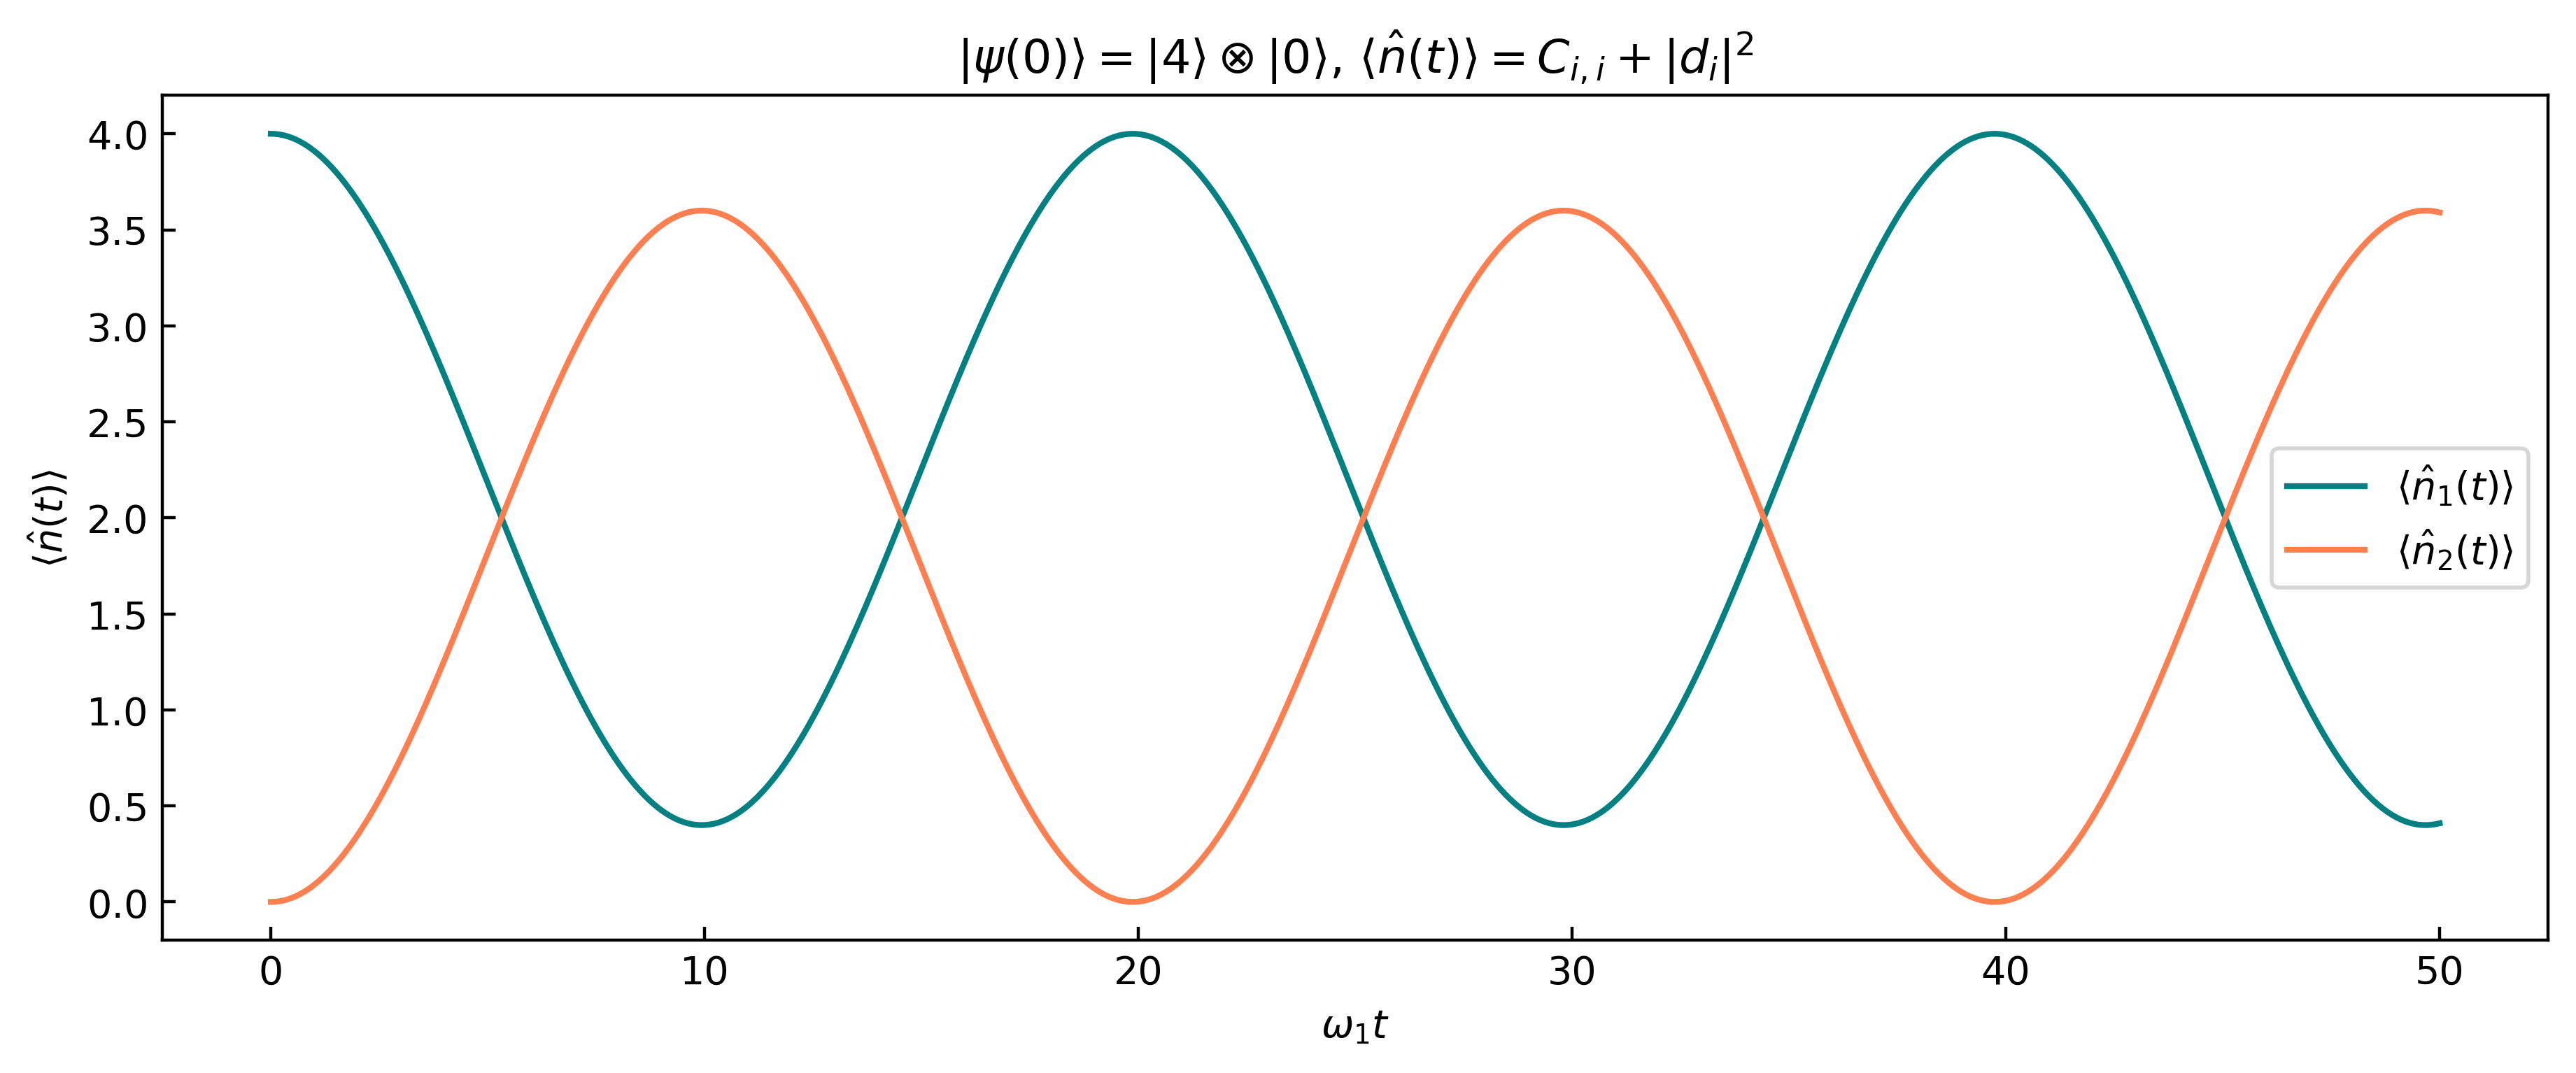

In [13]:
d = 15
state = kron(fock(4, d), fock(0, d))
statet = state.T.conjugate()

w1 = 5
w2 = 0.9 * w1
g = 0.3 * w1

t_size = 500
t = np.linspace(0, 50/w1, t_size)

a = anihilation(d)
I = np.eye(d, d)

a1 = kron(a, I)
a1dag = kron(a.T, I)
a2 = kron(I, a)
a2dag = kron(I, a.T)


H_matrix = np.array([[w1, g/2], [g/2, w2]])
V_dt = expm(-1j * H_matrix * (t[1]-t[0]))

d = np.array([[float(np.real(statet @ a1 @ state))], [float(np.real(statet @ a2 @ state))]])
ds = [d]
for i in range(1, t_size):
    d = V_dt @ d
    ds.append(d)

plt.figure(figsize = (11, 4), dpi = 400)
plt.tick_params(axis="both", direction="in")
plt.plot([i*w1 for i in t], [float(np.real(ds[i][0] + ds[i][0].conjugate())) for i in range(t_size)], c='teal', label=r'$\langle \hat{q}_1(t) \rangle/q_0$')
plt.plot([i*w1 for i in t], [float(np.real(ds[i][1] + ds[i][1].conjugate())) for i in range(t_size)], c='coral', label=r'$\langle \hat{q}_2(t) \rangle/q_0$')
plt.xlabel(r'$\omega_1t$')
plt.ylabel(r'$\langle \hat{q}(t) \rangle/q_0$')
plt.title(r'$|\psi(0)\rangle = |4\rangle \otimes |0\rangle$')
plt.legend()
plt.show()

V_dt_dag = V_dt.T.conjugate()

C11 = statet @ a1dag @ a1 @ state - (statet @ a1dag @ state * statet @ a1 @ state)
C12 = statet @ a2dag @ a1 @ state - (statet @ a2dag @ state * statet @ a1 @ state)
C21 = statet @ a1dag @ a2 @ state - (statet @ a1dag @ state * statet @ a2 @ state)
C22 = statet @ a2dag @ a2 @ state - (statet @ a2dag @ state * statet @ a2 @ state)

C = np.array([[float(C11.real), float(C12.real)], [float(C21.real), float(C22.real)]])

Cs = [C]
for i in range(1, t_size):
    C = V_dt @ C @ V_dt_dag
    Cs.append(C)

plt.figure(figsize = (11, 4), dpi = 400)
plt.tick_params(axis="both", direction="in")
plt.plot([i*w1 for i in t], [Cs[i][0,0].real + float(abs(ds[i][0]))**2 for i in range(t_size)], c='teal', label=r'$\langle \hat{n}_1(t) \rangle$')
plt.plot([i*w1 for i in t], [Cs[i][1,1].real + float(abs(ds[i][1]))**2 for i in range(t_size)], c='coral', label=r'$\langle \hat{n}_2(t) \rangle$')
plt.xlabel(r'$\omega_1t$')
plt.ylabel(r'$\langle \hat{n}(t) \rangle$')
plt.title(r'$|\psi(0)\rangle = |4\rangle \otimes |0\rangle$, $\langle \hat{n}(t) \rangle = C_{i,i} + |d_i|^2$')
plt.legend()
plt.show()

(c) Repeat the calculation for an initial product of coherent states, 
$$|\psi(0)\rangle = |\alpha_1\rangle\otimes |\alpha_2\rangle,$$
with $\alpha_1 = 2$ and $\alpha_2=0$. Comment on the similarities and differences between (b) and (c).

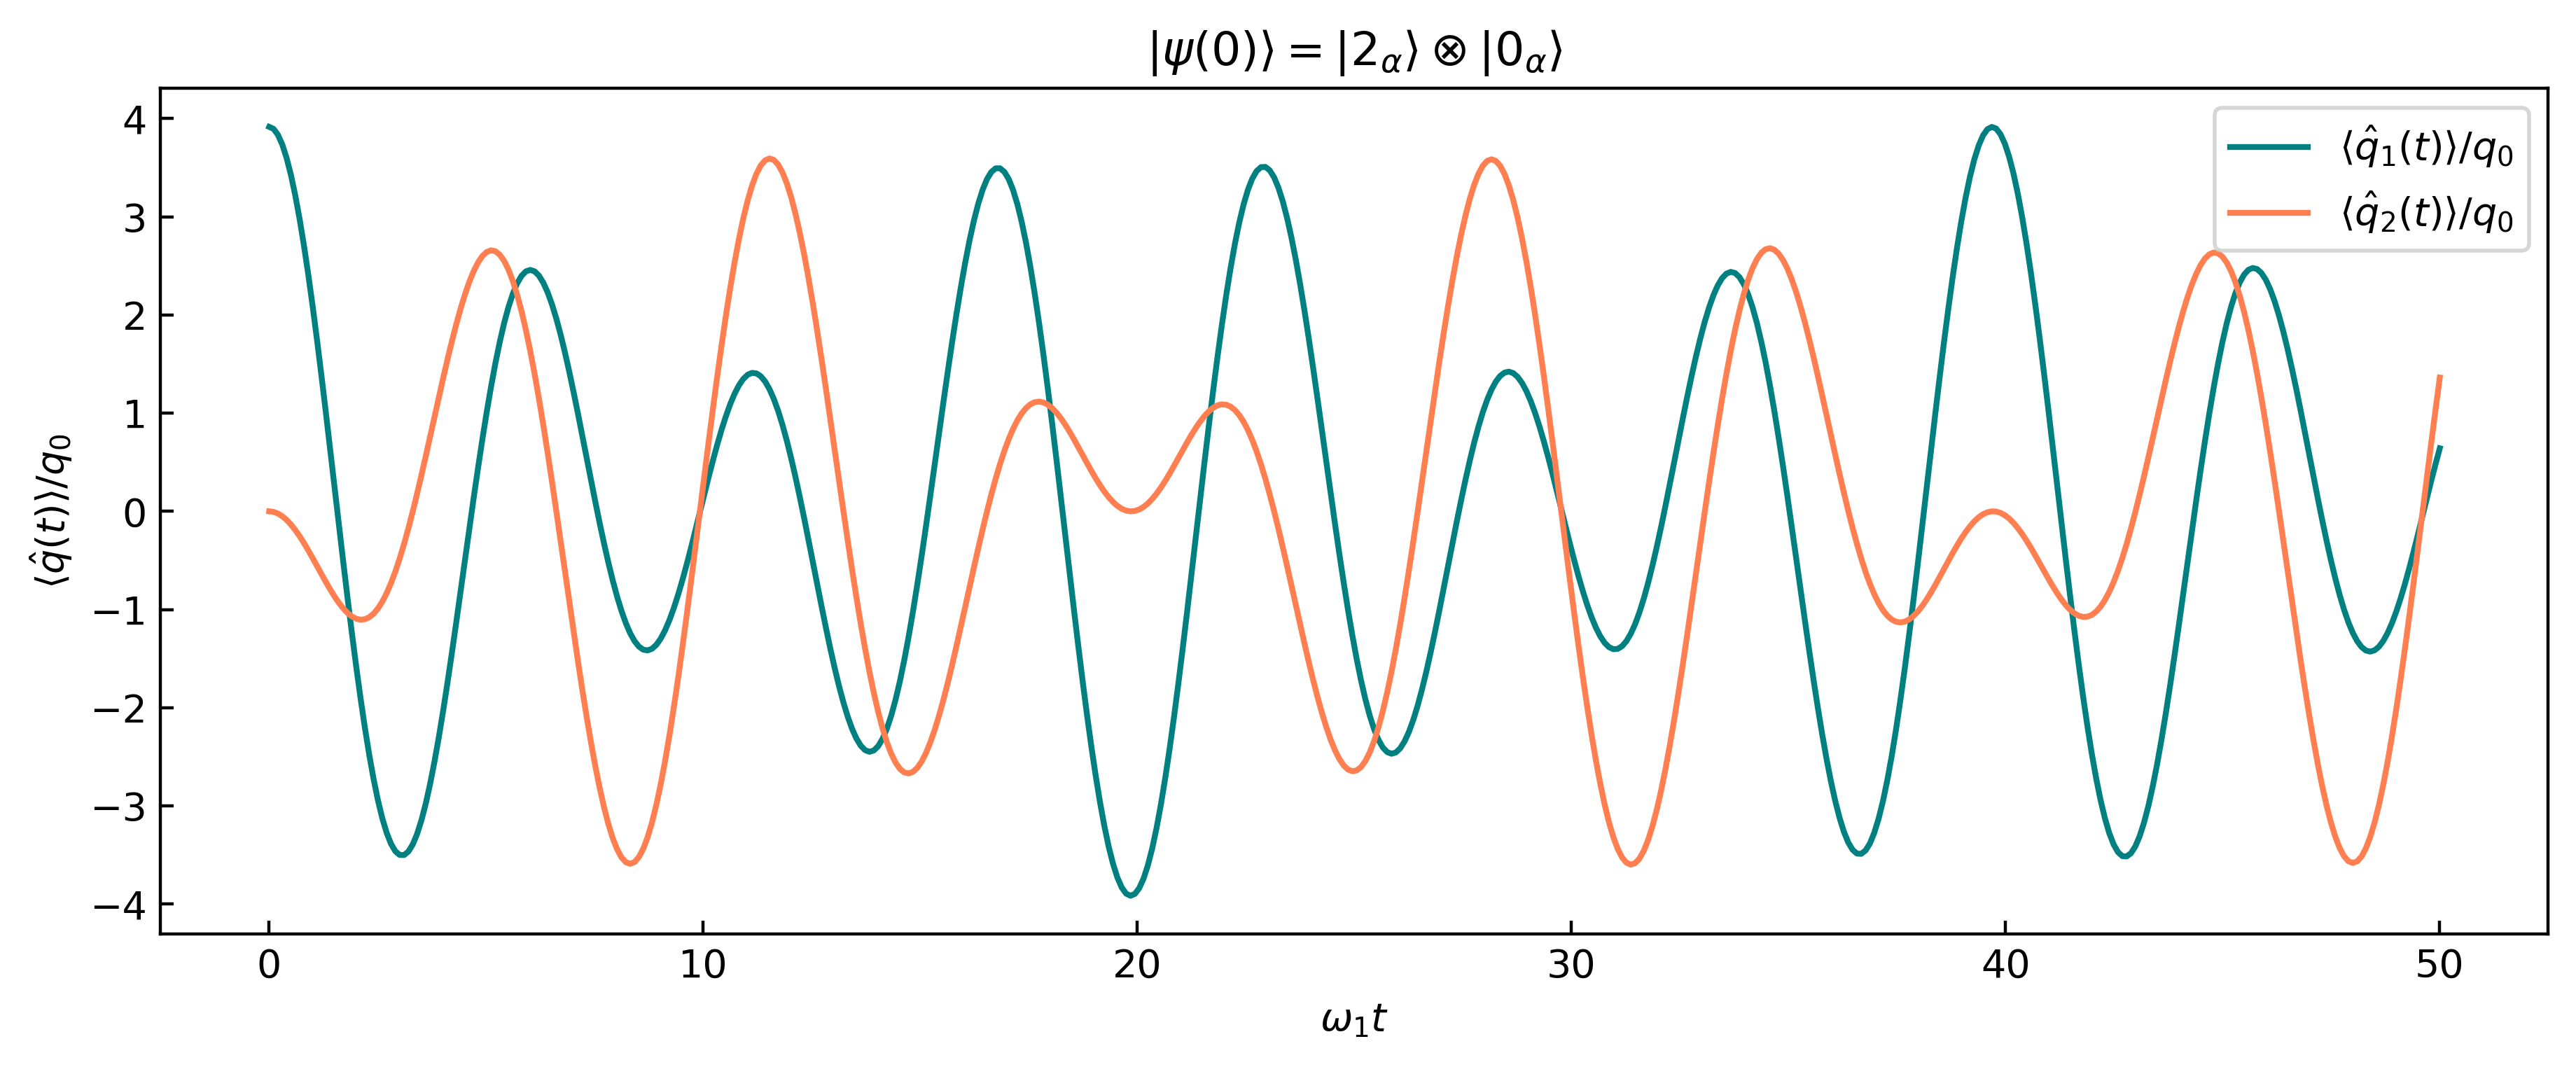

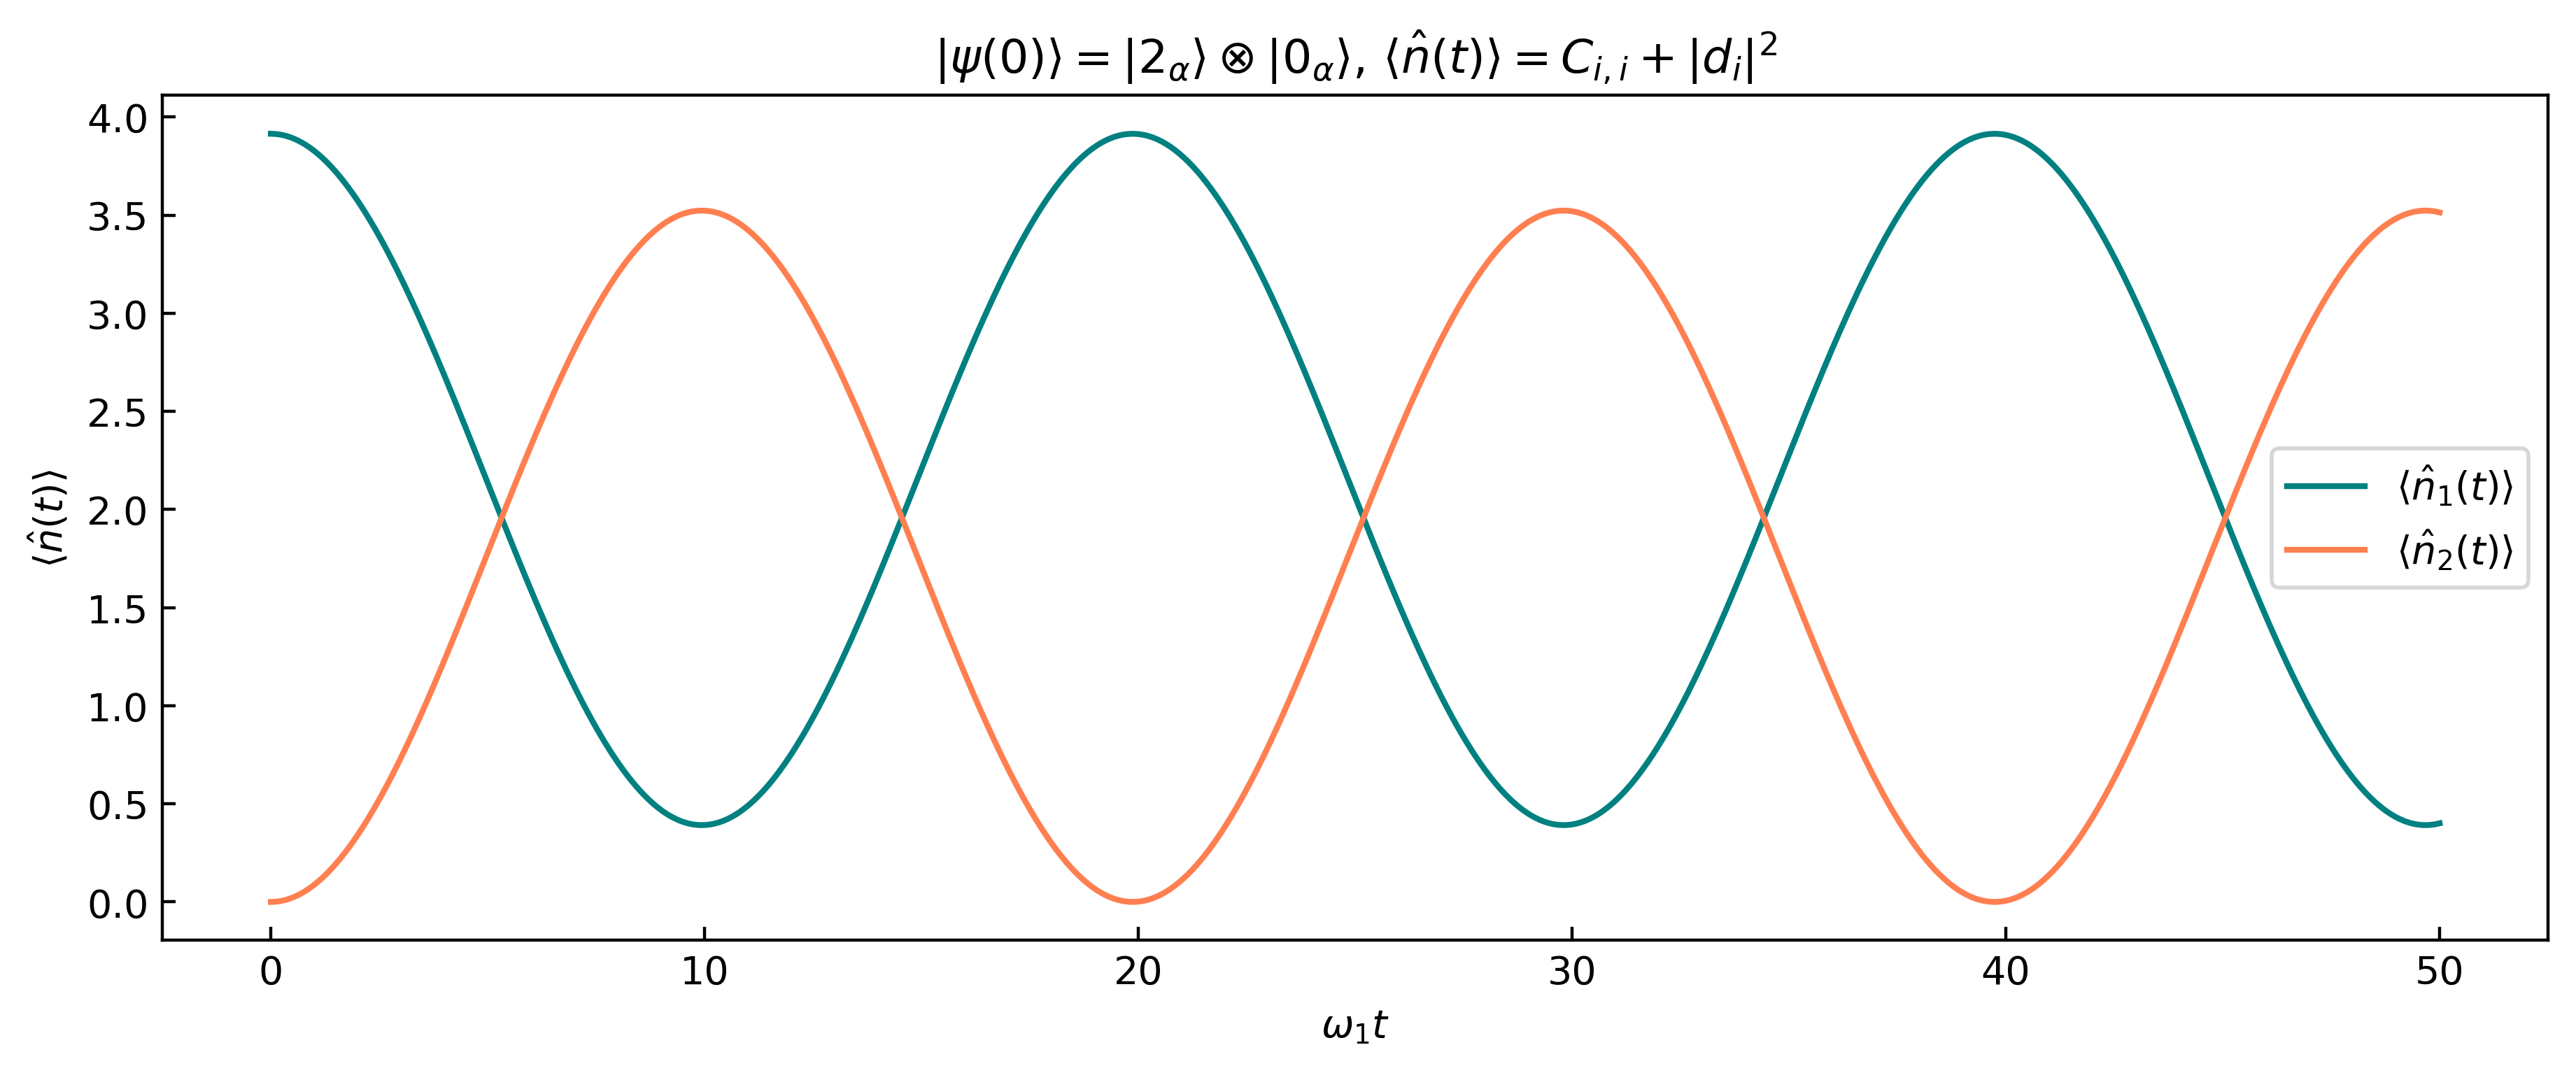

In [14]:
d = 10

def coh(alpha, d):
    factor = np.exp(-abs(alpha)**2/2)
    focks = [alpha**n/np.sqrt(np.math.factorial(n)) * fock(n, d) for n in range(d)]
    return factor * sum(focks)

state = kron(coh(2, d), coh(0, d))
statet = state.T.conjugate()

w1 = 5
w2 = 0.9 * w1
g = 0.3 * w1

t_size = 500
t = np.linspace(0, 50/w1, t_size)

a = anihilation(d)
I = np.eye(d, d)

a1 = kron(a, I)
a1dag = kron(a.T, I)
a2 = kron(I, a)
a2dag = kron(I, a.T)


H_matrix = np.array([[w1, g/2], [g/2, w2]])
V_dt = expm(-1j * H_matrix * (t[1]-t[0]))

d = np.array([[float(np.real(statet @ a1 @ state))], [float(np.real(statet @ a2 @ state))]])
ds = [d]
for i in range(1, t_size):
    d = V_dt @ d
    ds.append(d)

plt.figure(figsize = (11, 4), dpi = 400)
plt.tick_params(axis="both", direction="in")
plt.plot([i*w1 for i in t], [float(np.real(ds[i][0] + ds[i][0].conjugate())) for i in range(t_size)], c='teal', label=r'$\langle \hat{q}_1(t) \rangle/q_0$')
plt.plot([i*w1 for i in t], [float(np.real(ds[i][1] + ds[i][1].conjugate())) for i in range(t_size)], c='coral', label=r'$\langle \hat{q}_2(t) \rangle/q_0$')
plt.xlabel(r'$\omega_1t$')
plt.ylabel(r'$\langle \hat{q}(t) \rangle/q_0$')
plt.title(r'$|\psi(0)\rangle = |2_\alpha\rangle \otimes |0_\alpha\rangle$')
plt.legend()
plt.show()

V_dt_dag = V_dt.T.conjugate()

C11 = statet @ a1dag @ a1 @ state - (statet @ a1dag @ state * statet @ a1 @ state)
C12 = statet @ a2dag @ a1 @ state - (statet @ a2dag @ state * statet @ a1 @ state)
C21 = statet @ a1dag @ a2 @ state - (statet @ a1dag @ state * statet @ a2 @ state)
C22 = statet @ a2dag @ a2 @ state - (statet @ a2dag @ state * statet @ a2 @ state)

C = np.array([[float(C11.real), float(C12.real)], [float(C21.real), float(C22.real)]])

Cs = [C]
for i in range(1, t_size):
    C = V_dt @ C @ V_dt_dag
    Cs.append(C)

plt.figure(figsize = (11, 4), dpi = 400)
plt.tick_params(axis="both", direction="in")
plt.plot([i*w1 for i in t], [Cs[i][0,0].real + float(abs(ds[i][0]))**2 for i in range(t_size)], c='teal', label=r'$\langle \hat{n}_1(t) \rangle$')
plt.plot([i*w1 for i in t], [Cs[i][1,1].real + float(abs(ds[i][1]))**2 for i in range(t_size)], c='coral', label=r'$\langle \hat{n}_2(t) \rangle$')
plt.xlabel(r'$\omega_1t$')
plt.ylabel(r'$\langle \hat{n}(t) \rangle$')
plt.title(r'$|\psi(0)\rangle = |2_\alpha\rangle \otimes |0_\alpha\rangle$, $\langle \hat{n}(t) \rangle = C_{i,i} + |d_i|^2$')
plt.legend()
plt.show()

## 8 
Now consider a general $M$-mode quadratic Hamiltonian $$\hat{H} = \sum_{j,k=0}^{M-1} H_{jk}\hat{a}_j^\dagger\hat{a}_k$$ and let us assume for simplicity that $\mathbf{d}(0)=0$. The matrix $\mathbf{H}$ is Hermitian and thus can be diagonalised by a unitary transformation:

$$ \mathbf{U}^\dagger \cdot\mathbf{H}\cdot\mathbf{U}= \hbar \mathbf{\Omega} = \hbar \begin{pmatrix} \omega_0 & 0 & 0 \cdots \\ 
0 & \omega_1 & 0 \cdots \\ 
0 & 0 & \omega_2 \cdots \\ \vdots & \vdots & \vdots \;\ddots \end{pmatrix},$$

where $\hbar\omega_j$ are the eigenvalues of $\mathbf{H}$. Therefore, $\mathbf{H} = \hbar\mathbf{U}\cdot\mathbf{\Omega}\cdot\mathbf{U}^\dagger$ or, in components, 
$$H_{jk} = \sum_{l,m}U_{jl} \hbar\omega_l \delta_{lm}U_{km}^*.$$
By plugging this into the Hamiltonian, one finds
$$\hat{H} = \sum_{j=0}^{M-1} \hbar\omega_j \hat{b}_j^\dagger \hat{b}_j,$$
where $\hat{b}_j = \sum_{k}U_{kj}^*\hat{a}_k$. Since $[\hat{b}_j,\hat{b}_k^\dagger]=\delta_{jk}$, this represents the Hamiltonian as a sum of $M$ independent oscillators.

(a) Suppose that the system is in a thermal state, $\hat{\rho} = \frac{{\rm e}^{-\beta \hat{H}}}{Z}$, with $\beta = 1/k_BT$. Convince yourself that for this state, $$\langle \hat{b}_k\rangle = 0 ,\qquad \langle \hat{b}_j^\dagger \hat{b}_k\rangle = \bar{n}(\omega_k)\delta_{jk},$$ where $\bar{n}(\omega)$ is the Bose-Einstein distribution. Hence, show that the correlation matrix for a thermal state is
$$\mathbf{C} = \left( {\rm e}^{\beta \mathbf{H}} - 1\right)^{-1}.$$
(The correlation matrix is defined as in question 7, i.e. $C_{jk} = \langle\!\langle \hat{a}_k^\dagger \hat{a}_j\rangle\!\rangle = \langle \hat{a}_k^\dagger \hat{a}_j\rangle - \langle \hat{a}_k^\dagger\rangle\langle\hat{a}_j\rangle$.)

(b) Let us now apply these results to simulating the dynamics of a single oscillator system in contact with a large many-mode bath. Consider the Hamiltonian $\hat{H} = \hat{H}_S + \hat{H}_B + \hat{H}_{SB}$, where
\begin{align}
&\hat{H}_S = \hbar\nu_0 \hat{a}_0^\dagger \hat{a}_0 \\,\qquad &\hat{H}_B = \sum_{j=1}^{M-1} \hbar\nu_j \hat{a}_j^\dagger \hat{a}_j + \sum_{j=1}^{M-2} \frac{\hbar W}{2} \left( \hat{a}_j^\dagger\hat{a}_{j+1} + \hat{a}_j\hat{a}_{j+1}^\dagger \right),\\
& \hat{H}_{SB} = \frac{\sqrt{\Gamma W}}{2}\left(\hat{a}_0^\dagger \hat{a}_1 + \hat{a}_0\hat{a}_1^\dagger\right).
\end{align}
This models a bath comprising a one-dimensional chain of oscillators coupled to the system at one of its ends ($j=1$). Write a function that constructs the matrix $\mathbf{H}$ for the *full* system-bath Hamiltonian $\hat{H} = \sum_{j,k}H_{jk}\hat{a}_j^\dagger\hat{a}_k$, taking the parameters $\{\nu_j\}$, $W$, $\Gamma$, and $M$ as input. Write another function that constructs the corresponding thermal correlation matrix $\mathbf{C}$. Test your function by printing the thermal correlation matrix for the parameters $M=4$, $\nu_j = \nu_0 = 2$, $W=0.5$, $\Gamma=0.05$ and $\beta=0.5$.

In [15]:
def H_matrix(nus, W, G, M):
    H = np.zeros((M, M))
    H[0, 0] = nus[0]
    H[0, 1] = H[1, 0] =  np.sqrt(G*W)/2
    for i in range(1, M):
        H[i,i] = nus[i]
        if i<M-1:
            H[i, (i+1)%M] += W/2 
            H[(i+1)%M, i] += W/2
    return H
M = 4
nus = [2 for i in range(M)]
W, G, beta = 0.5, 0.05, 0.5


def C_matrix(nus, W, G, M, beta):
    return np.linalg.matrix_power(expm(beta * H_matrix(nus, W, G, M)) -1, -1)

print('Matrix for the full bath-system hamiltonian:','\n',H_matrix(nus, W, G, M))
print('Thermal correlation matrix:','\n',C_matrix(nus, W, G, M, beta))

Matrix for the full bath-system hamiltonian: 
 [[2.         0.07905694 0.         0.        ]
 [0.07905694 2.         0.25       0.        ]
 [0.         0.25       2.         0.25      ]
 [0.         0.         0.25       2.        ]]
Thermal correlation matrix: 
 [[-0.08533955 -0.41519003 -0.36000928 -0.41890125]
 [-0.41519003  0.01717215 -0.36505713 -0.36712224]
 [-0.36000928 -0.36505713  0.08640644 -0.37957463]
 [-0.41890125 -0.36712224 -0.37957463 -0.01610526]]


(c) Now let us perform a dynamical simulation of a thermalisation process. Start from the product state $$\hat{\rho}(0) = |0\rangle\langle 0|\otimes \frac{{\rm e}^{-\beta\hat{H}_B}}{Z_B},$$
where $|0\rangle$ is the vacuum for mode $\hat{a}_0$. Construct the correlation matrix for this state and then evolve it as a function of time using the method of question 7, with parameters $\nu_j =\nu_0 = 2$, $W=0.5$, $\Gamma=0.05$, $\beta=0.5$, $M=51$, and up to a time $\Gamma t = 10$.  Specifically, plot the occupation of the system oscillator, $\langle \hat{a}_0^\dagger \hat{a}_0\rangle$, as a function of time. Explore how this open-system evolution changes as the number of oscillators, $M$, and the system-reservoir coupling, $\Gamma$, is increased or decreased. Comment briefly on your results.

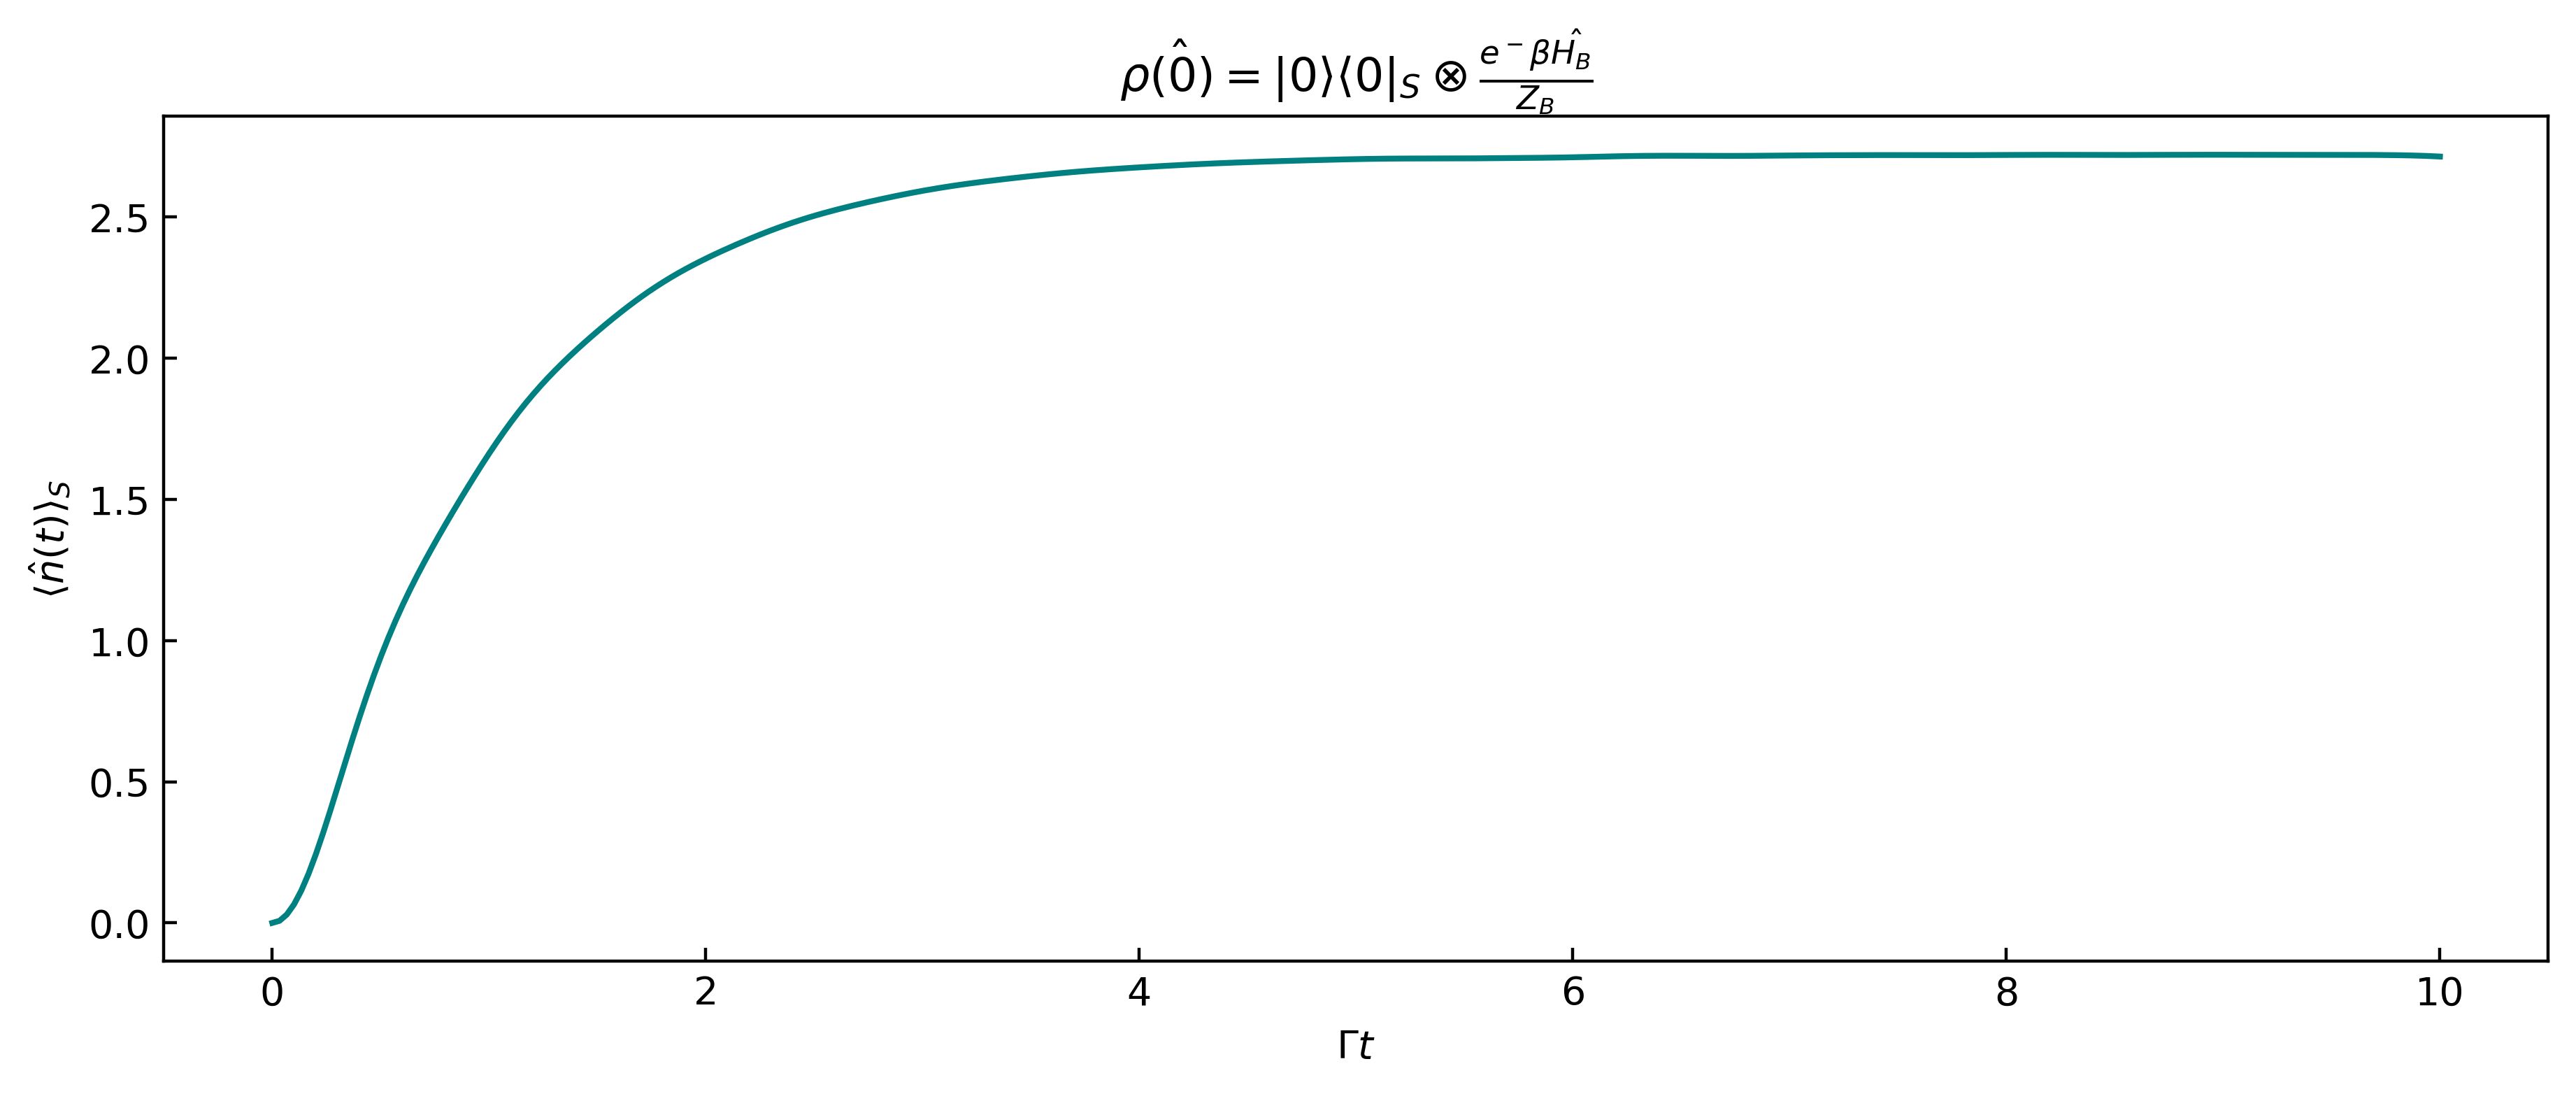

In [16]:
#the covariance matrix can be built by direct sum of the subsystems' covariance matrices

def H_matrix(nus, W, G, M):
    H = np.zeros((M, M))
    H[0, 0] = nus[0]
    H[0, 1] = H[1, 0] =  np.sqrt(G*W)/2
    for i in range(1, M):
        H[i,i] = nus[i]
        if i<M-1:
            H[i, (i+1)%M] += W/2 
            H[(i+1)%M, i] += W/2
    return H

def C_8c(nus, W, G, beta, M):
    H = H_matrix(nus, W, G, M)
    H_B = H[1:, 1:]
    C_B = np.linalg.matrix_power(expm(-beta * H_B)-1, -1)
    C = np.pad(C_B, [(1,0), (1,0)]) #since the covariance matrix for |0><0| is a 0
    return C


M = 51
nus = [2 for i in range(M)]
W, G, beta = 0.5, 0.05, 0.5
time_size = 300
t = np.linspace(0, 10/G, time_size)

H_ = H_matrix(nus, W, G, M)

V_dt = expm(-1j * H_ * (t[1]-t[0]))
V_dt_dag = V_dt.T.conjugate()


C = C_8c(nus, W, G, beta, M)

cov = [C[0,0].real] #we're only interested in the population of the system oscillator
for i in range(1, time_size):
    C = V_dt @ C @ V_dt_dag
    cov.append(C[0,0].real)
    
'''the populations can be retrieved by the diagonal elements of the covariance matrix because the initial expectation values 
    of the creation and anihilation operators of all modes are 0, and therefore will not change in time, so C_ii=<adag_i a_i>
    that is, the population of every mode (including the system oscillator)'''

plt.figure(figsize = (11, 4), dpi = 400)
plt.tick_params(axis="both", direction="in")
plt.plot([i*G for i in t], [cov[i] for i in range(time_size)], c='teal')
plt.xlabel(r'$\Gamma t$')
plt.ylabel(r'$\langle \hat{n}(t) \rangle_S$')
plt.title(r'$\hat{\rho(0)} = |0\rangle\langle 0 |_S \otimes \frac{e^-\beta\hat{H_B}}{Z_B}$')
plt.show()

As it can be seen, the contact with the bath in a thermal state allows the system to thermalise. This is observed by the expectation value reaching a steady value when the time increases.